In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import torch
from rank_bm25 import BM25Okapi
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizer
from rank_bm25 import BM25Okapi
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors
from sentence_transformers import SentenceTransformer, util
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Download stopwords 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ramaalmrahleh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ramaalmrahleh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
data = pd.read_csv("resume_dataset.csv")

In [114]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (data['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Category
Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
Web Designing                 5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
PMO                           3
Name: count, dtype: int64


In [115]:
Data_Science_data = data[data['Category'] == 'Data Science']
print(f"Number of resumes in HR category: {Data_Science_data.shape[0]}")

Number of resumes in HR category: 10


In [116]:
Data_Science_data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [117]:
Data_Science_data.iloc[0]['Resume'] #yes

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \nData Science Assurance AssociateData Science Assurance Associate - Ernst & Young LLPSkill Details \nJAVASCRIPT- Exprience - 24 months\njQuery- Exprience - 24 months\nPython- Exprience - 24 monthsCompany Details \ncompany - Ernst & Young LLP\ndescription - Fraud Investigations and Dispute Services   Ass

In [118]:
Data_Science_data.iloc[1]['Resume']

'Education Details \nMay 2013 to May 2017 B.E   UIT-RGPVData ScientistData Scientist - MatelabsSkill Details \nPython- Exprience - Less than 1 year months\nStatsmodels- Exprience - 12 months\nAWS- Exprience - Less than 1 year months\nMachine learning- Exprience - Less than 1 year months\nSklearn- Exprience - Less than 1 year months\nScipy- Exprience - Less than 1 year months\nKeras- Exprience - Less than 1 year monthsCompany Details \ncompany - Matelabs\ndescription - ML Platform for business professionals, dummies and enthusiasts.\n60/A Koramangala 5th block,\nAchievements/Tasks behind sukh sagar, Bengaluru,\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\nDeployed automated classification and regression model.\nlinkedin.com/in/aditya-rathore-\nb4600b146                           Reasearch and deployed the time 

In [119]:
Data_Science_data.iloc[2]['Resume']

'Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \nJanuary 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology\nJanuary 2015    DEEKSHA CENTER\nJanuary 2013    Little Flower Public School\nAugust 2000    Manipal Academy of HigherDATA SCIENCEDATA SCIENCE AND ELECTRICAL ENTHUSIASTSkill Details \nData Analysis- Exprience - Less than 1 ye

In [120]:
Data_Science_data.iloc[3]['Resume']

"Skills â\x80¢ R â\x80¢ Python â\x80¢ SAP HANA â\x80¢ Tableau â\x80¢ SAP HANA SQL â\x80¢ SAP HANA PAL â\x80¢ MS SQL â\x80¢ SAP Lumira â\x80¢ C# â\x80¢ Linear Programming â\x80¢ Data Modelling â\x80¢ Advance Analytics â\x80¢ SCM Analytics â\x80¢ Retail Analytics â\x80¢Social Media Analytics â\x80¢ NLP Education Details \nJanuary 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological UniversityData Science ConsultantConsultant - Deloitte USISkill Details \nLINEAR PROGRAMMING- Exprience - 6 months\nRETAIL- Exprience - 6 months\nRETAIL MARKETING- Exprience - 6 months\nSCM- Exprience - 6 months\nSQL- Exprience - Less than 1 year months\nDeep Learning- Exprience - Less than 1 year months\nMachine learning- Exprience - Less than 1 year months\nPython- Exprience - Less than

In [121]:
Data_Science_data.iloc[4]['Resume']

'Education Details \n MCA   YMCAUST,  Faridabad,  HaryanaData Science internshipSkill Details \nData Structure- Exprience - Less than 1 year months\nC- Exprience - Less than 1 year months\nData Analysis- Exprience - Less than 1 year months\nPython- Exprience - Less than 1 year months\nCore Java- Exprience - Less than 1 year months\nDatabase Management- Exprience - Less than 1 year monthsCompany Details \ncompany - Itechpower\ndescription - '

In [122]:
Data_Science_data.iloc[5]['Resume']

"SKILLS C Basics, IOT, Python, MATLAB, Data Science, Machine Learning, HTML, Microsoft Word, Microsoft Excel, Microsoft Powerpoint. RECOGNITION Academic Secured First place in B.Tech.Education Details \nAugust 2014 to May 2018 B.Tech.  Ghatkesar, Andhra Pradesh Aurora's Scientific and Technological Institute\nJune 2012 to May 2014  Secondary Education Warangal, Telangana SR Junior CollegeData ScienceSkill Details \nMS OFFICE- Exprience - Less than 1 year months\nC- Exprience - Less than 1 year months\nmachine learning- Exprience - Less than 1 year months\ndata science- Exprience - Less than 1 year months\nMatlab- Exprience - Less than 1 year monthsCompany Details \ncompany - \ndescription - "

In [123]:
Data_Science_data.iloc[6]['Resume']

'Skills â\x80¢ Python â\x80¢ Tableau â\x80¢ Data Visualization â\x80¢ R Studio â\x80¢ Machine Learning â\x80¢ Statistics IABAC Certified Data Scientist with versatile experience over 1+ years in managing business, data science consulting and leading innovation projects, bringing business ideas to working real world solutions. Being a strong advocator of augmented era, where human capabilities are enhanced by machines, Fahed is passionate about bringing business concepts in area of machine learning, AI, robotics etc., to real life solutions.Education Details \nJanuary 2017 B. Tech Computer Science & Engineering Mohali, Punjab Indo Global College of EngineeringData Science ConsultantData Science Consultant - DatamitesSkill Details \nMACHINE LEARNING- Exprience - 13 months\nPYTHON- Exprience - 24 months\nSOLUTIONS- Exprience - 24 months\nDATA SCIENCE- Exprience - 24 months\nDATA VISUALIZATION- Exprience - 24 months\nTableau- Exprience - 24 monthsCompany Details \ncompany - Datamites\ndesc

In [124]:
Data_Science_data.iloc[7]['Resume'] #yes

'Education Details \n B.Tech   Rayat and Bahra Institute of Engineering and BiotechnologyData ScienceData ScienceSkill Details \nNumpy- Exprience - Less than 1 year months\nMachine Learning- Exprience - Less than 1 year months\nTensorflow- Exprience - Less than 1 year months\nScikit- Exprience - Less than 1 year months\nPython- Exprience - Less than 1 year months\nGCP- Exprience - Less than 1 year months\nPandas- Exprience - Less than 1 year months\nNeural Network- Exprience - Less than 1 year monthsCompany Details \ncompany - Wipro\ndescription - Bhawana Aggarwal\nE-Mail:bhawana.chd@gmail.com\nPhone: 09876971076\nVVersatile, high-energy professional targeting challenging assignments in Machine\nPROFILE SUMMARY\nâ\x96ª An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine\nLearning, Deep Learning, Data Science, Python, Software Development.\nâ\x96ª Skilled in managing end-to-end development and software products / projects from inception, requirem

In [125]:
Data_Science_data.iloc[8]['Resume'] #yes

'Personal Skills â\x9e¢ Ability to quickly grasp technical aspects and willingness to learn â\x9e¢ High energy levels & Result oriented. Education Details \nJanuary 2018 Master of Engineering Computer Technology & Application Bhopal, Madhya Pradesh Truba Institute of Engineering & Information Technology\nJanuary 2010 B.E. computer science Bhopal, Madhya Pradesh RKDF Institute of Science and Technology College of Engineering\nJanuary 2006 Polytechnic Information Technology Vidisha, Madhya Pradesh SATI Engineering College in Vidisha\nJanuary 2003 M.tech Thesis Detail  BMCH School in Ganj basodaData scienceI have six month experience in Data Science. Key Skills: - Experience in Machine Learning, Deep Leaning, NLP, Python, SQL, Web Scraping Good knowledge in computer subjects and ability to updateSkill Details \nExperience in Machine Learning, Deep Learning, NLP, Python, SQL, Web Crawling, HTML,CSS.- Exprience - Less than 1 year monthsCompany Details \ncompany - RNT.AI Technology Solution\

In [126]:
Data_Science_data.iloc[9]['Resume'] #yes

'Expertise â\x88\x92 Data and Quantitative Analysis â\x88\x92 Decision Analytics â\x88\x92 Predictive Modeling â\x88\x92 Data-Driven Personalization â\x88\x92 KPI Dashboards â\x88\x92 Big Data Queries and Interpretation â\x88\x92 Data Mining and Visualization Tools â\x88\x92 Machine Learning Algorithms â\x88\x92 Business Intelligence (BI) â\x88\x92 Research, Reports and Forecasts Education Details \n PGP in Data Science  Mumbai, Maharashtra Aegis School of data science & Business\n B.E. in Electronics & Communication Electronics & Communication Indore, Madhya Pradesh IES IPS AcademyData ScientistData Scientist with PR CanadaSkill Details \nAlgorithms- Exprience - 6 months\nBI- Exprience - 6 months\nBusiness Intelligence- Exprience - 6 months\nMachine Learning- Exprience - 24 months\nVisualization- Exprience - 24 months\nspark- Exprience - 24 months\npython- Exprience - 36 months\ntableau- Exprience - 36 months\nData Analysis- Exprience - 24 monthsCompany Details \ncompany - Aegis schoo

In [127]:
job_description = """
Job Title: AI Engineer

Job Type: Full-Time

Location: Remote

About us:
micro1 connects exceptional talent to transformative projects. We’re here to provide not just a job, but a platform for you to grow and achieve your career goals. We're proud to work with trusted partners such as Deel, Immutable, O’Gara, and LegalSoft.

What We Offer:
Work from anywhere
Healthcare reimbursement
Wi-Fi reimbursement
Unlimited learning and more.

Job Summary:
Join our dynamic team at micro1 as an AI Engineer. You'll have the opportunity to develop cutting-edge machine learning models and AI-driven solutions from anywhere in the world. This role not only offers the chance to work on impactful projects but also provides a supportive environment focused on your career growth.

Key Responsibilities:
Develop and optimize deep learning models using frameworks like PyTorch and TensorFlow.
Collaborate closely with product teams to integrate AI solutions seamlessly.
Design and implement Natural Language Processing (NLP) solutions to enhance user experience.
Conduct thorough testing and validation of machine learning models.
Stay updated with the latest advancements in AI and deep learning technologies.
Document processes and findings clearly to support team knowledge sharing.
Analyze data sets to extract meaningful insights for business applications.

Required Skills and Qualifications:
Proficiency in Deep Learning frameworks such as PyTorch and TensorFlow.
Strong experience with Natural Language Processing (NLP) models and techniques.
Excellent written and verbal communication skills.
Demonstrated ability to work independently in a remote setting.
Solid understanding of machine learning algorithms and principles.

Preferred Qualifications:
Experience with Reinforcement Learning.
Familiarity with cloud-based AI services and deployment."""

In [128]:
Data_Science_data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [129]:
# Create the 'chosen' feature
Data_Science_data['chosen'] = Data_Science_data.index.map(lambda x: 1 if x in [0, 7, 8,9] else 0)

print(Data_Science_data)

       Category                                             Resume  chosen
0  Data Science  Skills * Programming Languages: Python (pandas...       1
1  Data Science  Education Details \nMay 2013 to May 2017 B.E  ...       0
2  Data Science  Areas of Interest Deep Learning, Control Syste...       0
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...       0
4  Data Science  Education Details \n MCA   YMCAUST,  Faridabad...       0
5  Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...       0
6  Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...       0
7  Data Science  Education Details \n B.Tech   Rayat and Bahra ...       1
8  Data Science  Personal Skills â¢ Ability to quickly grasp t...       1
9  Data Science  Expertise â Data and Quantitative Analysis â...       1


/var/folders/dm/y1vt4m8j43xbl9qk9zyfh22h0000gn/T/ipykernel_1686/1767284651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Science_data['chosen'] = Data_Science_data.index.map(lambda x: 1 if x in [0, 7, 8,9] else 0)


In [130]:
Data_Science_data

,Category,Resume,chosen
0,Data Science,Skills * Programming Languages: Python (pandas...,1
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1
9,Data Science,Expertise â Data and Quantitative Analysis â...,1


In [131]:
# New HR CV
hr_cv = """
 HR CONSULTANT       Summary       Subject matter expert in HR Applications, and  highly effective at incorporating creative solutions to achieve business objectives, and improve efficiency.  Energetic HR Business Analyst who is self-motivated and results-driven with strong communication, analytical, problem solving and reasoning skills.        Highlights          Analytical skills  Project management  Process improvement  Quality assurance and control  System Applications implementation  Microsoft Office Suite expert      Working independently  Strong interpersonal skills  Results-oriented  Fluent in English and Portuguese  Detail-oriented  Troubleshooting  Problem solving            Experience      HR Consultant   10/2016       Company Name   City  ,   State      HRIS - Business Analyst:   

Process demand analysis, scoping, and gathering of
requirements for small and large scale HR projects
  
Prepare Business Requirement Documents after
projects have been approved by PMO  Close the gap communication between businesses
and IS 

Support and coordinate functional testing
processes to make sure stakeholders' objectives are met  Document systems and process flows  

Document and analyze current and future
processes/systems  Deliver and Support user training
  
Process security internal control on the quarterly
basis to assess US HR/Payroll system users.   Send recommendations, and remove/add users
per business requests from local and global systems   

Investigate, coordinate, and resolve with
subject matter experts and/or IS regarding local and Global system issues

  Request HR global system back end/portal roles
for local HRBPs, COE and Front Office users (Americas)  

Responsible to coordinate system applications
changes and new requirements with IS       People Analytics lead:   

Run and deliver the monthly Department of Labor reports
  
Create, run and deliver reports that are
outside GBS People Analytics India's scope  

Support both US Front Office, GBS India, and Americas
Region Center of Excellence with reports and analysis requests          Business System Applications Analyst   02/2014   to   04/2016     Company Name   City  ,   State       Served as conduit between internal and external customers including the IS team through several HRIS projects and daily activities such as interface and data input troubleshooting   Provided expertise in business analysis for several HRIS projects  Acted as project lead in several HRIS projects, and supported functional testing processes to ensure that system projects meet the needs of all stakeholders  Support user acceptance testing, and user training  Coordinated communications with business and vendors  Documented and analyzed current and future processes/systems  Identified and mapped business needs  Ensured successful project delivery according to business/vendors expectations    Accomplishments:    Implemented Red Carpet/Silkroad On boarding application for US; which improved significantly the new employees' on boarding experience and open visibility to business eliminating cumbersome manual processes  Acted as project lead for the Master Data and Benefits interface projects for the in house ERP implementation project.  Worked closely with ADP and business to implement Affordable Care Act in ERP          HRIS Master Data Team Lead   06/2011   to   02/2014     Company Name   City  ,   State      •	Trained the HR Specialists to navigate and maintain new/updated system applications and processes  •	Monitored data quality and accuracy based on local/global internal controls  •	Responsible for working with ADP IS to implement new/changes on the HRIS system according to payroll, local and global business requirements.​  •	Ran payroll/non payroll impacting mass loads in SAP for payroll, benefits, or other business purposes.  •	Created and ran reports for subject matter experts  •	Created and ran monthly/quarterly governmental reports  •	Designed and documented HR workflow processes  •	Trained US HR business partners to navigate and utilize the HR/Payroll system   Accomplishments:      Successfully lead and implemented the Workers Comp report project.   Trained the Canadian team on the Global processes for Organization Management and Personnel Administration, and Global System super users          SAP Timekeeping Analyst   05/2009   to   11/2010     Company Name   City  ,   State       Gathered all the necessary business and government requirements, including approvals to create/modify Time calculations for new sites or policy changes.  Collected all the time files according to payroll schedules for payroll processing  Processed data analysis and reconciliation  Worked closely with business, Employees Services, and IS to resolve issues/troubleshooting       Accomplishments :   Delivered the time files
without delay for payroll processing for around 47 sites (9,500 employees and around 1,000 contractors)  Designed and implemented solutions
through Access and Excel advanced formulas to validate the data quality, and accuracy
of the data and time results before transmitting the files to payroll� This replaced the manual process enabling efficiency and delivery of files timely           HR Data and Applications Specialist   04/2007   to   05/2009     Company Name   City  ,   State       Supported Human Resources Shared Services and act as the subject matter expert for SAP HCM and other HR applications.  Supported Finance, Canada / US Payrolls, and Human Resources Shared Services on bi-weekly and year-end activities   Collaborated with Information Systems, Finance, Canada and US Payroll and Human Resources Business owners on Sarbanes-Oxley requirements and system/process enhancements for key areas of responsibility.  Worked closely with business process owners, smes, benefit vendors and Information Systems to ensure data flow were properly planned and managed, and ensure appropriate data quality controls and standards were developed and maintained globally.  Performed root cause analysis, developed and managed corrective action plans.  Run and analyzed interface error reports for Canada and US payroll systems per Sarbanes-Oxley requirements.  Work closely with process owners and Information Systems to research/ identify/ resolve any interface or data issue identified with vendors or payroll systems  Acted as a project liaison between Human Resources and Information System teams for multiple HR or payroll projects (examples: SAP HCM Compensation project, Canadian Payroll system, European Expat project, US Payroll Year End, Benefits Annual Enrollment, SAP releases)  Provided system training and support for Human Resources Shared Services employees globally for key areas of responsibility  Scheduled release calls, prepared work instructions & Knowledge Base Articles, developed and/or coordinated training for Human Resources Shared Services both locally and regionally   Articulated and identified process improvement opportunities within Human Resources   Analyzed and identify processing issues and escalated to Canada and US Payroll, Human Resources and Quality Assurance teams  Created and run Adhoc reports for all Human Resources Shared Services, Internal and External Auditors per Sarbanes-Oxley requirements   Transferred 60 auditing control activities to Quality Assurance team.  Trained new data integrity processors for Quality Assurance   Developed HR compliance reports for Asia, Europe, Canada and US through SAP and DARE systems   Developed 75 reports for external auditors, and developed data integrity and metric reports for 2008 and 2009 Benefits Annual Enrollment   Coordinated testing, meetings, training and communication for Benefits Annual Enrollment for 2008 and 2009 projects for US and Canada.  Lead the review and training of the Canadian Payroll system for all specialists and processors within HR Shared Services           Education      BBA  :   Business Administration   May 2009       Campbell University   City  ,   State  ,   US             Languages    Portuguese, Spanish and English      Skills    Advanced Excel, Access, Word, Visio, Power Point, VBA, SAP HCM, Success Factors (Compensation), Microsoft Project Management, Service Now (ASKHR), Smartsheet, Panaya, SilkRoad - Red Carpet   

Skills    NLP , machine learning , deep learning , Advanced Excel, Access, Word, Visio, Power Point, VBA, SAP HCM, Success Factors (Compensation), Microsoft Project Management, Service Now (ASKHR), Smartsheet, Panaya, SilkRoad - Red Carpet."""

new_row = {
    "Category": "HR",
    "Resume": hr_cv,
    "chosen": 0,
}

new_row_df = pd.DataFrame([new_row]) 
Data_Science_data = pd.concat([Data_Science_data, new_row_df], ignore_index=True)
print(Data_Science_data)

        Category                                             Resume  chosen
0   Data Science  Skills * Programming Languages: Python (pandas...       1
1   Data Science  Education Details \nMay 2013 to May 2017 B.E  ...       0
2   Data Science  Areas of Interest Deep Learning, Control Syste...       0
3   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...       0
4   Data Science  Education Details \n MCA   YMCAUST,  Faridabad...       0
5   Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...       0
6   Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...       0
7   Data Science  Education Details \n B.Tech   Rayat and Bahra ...       1
8   Data Science  Personal Skills â¢ Ability to quickly grasp t...       1
9   Data Science  Expertise â Data and Quantitative Analysis â...       1
10            HR  \n HR CONSULTANT       Summary       Subject m...       0


In [132]:
Data_Science_data.to_csv("Data_Science_data.csv", index=False)

In [133]:
def compute_cosine_similarity(job_desc_embedding, resume_embeddings, resumes_df):
    """
    Computes the cosine similarity between a job description embedding and resume embeddings.

    Args:
        job_desc_embedding (array-like): Embedding vector for the job description.
        resume_embeddings (array-like): Matrix of embeddings for resumes.
        resumes_df (pd.DataFrame): DataFrame containing resume data.

    Returns:
        pd.DataFrame: Updated DataFrame with similarity scores, sorted in descending order.
    """
    # Ensure job_desc_embedding is a 2D array (1, N)
    job_desc_embedding = np.array(job_desc_embedding).reshape(1, -1)

    # Compute cosine similarity between job description and all resumes
    similarity_scores = cosine_similarity(job_desc_embedding, resume_embeddings)[0]

    # Create a copy of the DataFrame to avoid modifying a slice
    #resumes_df = resumes_df.copy()

    # Add similarity scores to the DataFrame
    resumes_df.loc[:, 'similarity_score'] = similarity_scores

    # Sort resumes by similarity score in descending order
    resumes_df = resumes_df.sort_values(by='similarity_score', ascending=False)

    return resumes_df


In [134]:
def evaluate_resume_ranking_general(sorted_resumes, true_label_column="chosen", top_n=None):
    """
    Evaluate the ranking of resumes based on a sorted DataFrame (pre-sorted by scoring method).

    Args:
        sorted_resumes (pd.DataFrame): Pre-sorted DataFrame based on scoring method (e.g., cosine, BM25, hybrid).
        true_label_column (str): The column containing the true labels (default is 'chosen').
        top_n (int, optional): Number of top resumes to evaluate. If None, use the total number of 'chosen' resumes.

    Returns:
        dict: Evaluation metrics including precision, recall, ordering accuracy, and detailed metrics (TP, FP, FN, TN).
    """
    # Step 1: Ground truth: Indices of chosen resumes
    true_chosen_indices = sorted_resumes[sorted_resumes[true_label_column] == 1].index.tolist()

    # Step 2: Use top_n if provided, otherwise default to the number of true chosen resumes
    top_n = max(top_n or len(true_chosen_indices), len(true_chosen_indices))
    predicted_top_indices = sorted_resumes.head(top_n).index.tolist()

    # Step 3: Evaluate precision
    correct_predictions = [idx for idx in predicted_top_indices if idx in true_chosen_indices]
    precision = len(correct_predictions) / top_n

    # Step 4: Evaluate recall
    recall = len(correct_predictions) / len(true_chosen_indices)

    # Step 5: Evaluate ordering accuracy
    true_chosen_order_in_predictions = [idx for idx in predicted_top_indices if idx in true_chosen_indices]
    ordering_accuracy = 1 if true_chosen_order_in_predictions == true_chosen_indices else 0

    # Step 6: Calculate TP, FP, FN, TN
    TP = set(predicted_top_indices) & set(true_chosen_indices)  # True Positives
    FP = set(predicted_top_indices) - set(true_chosen_indices)  # False Positives
    FN = set(true_chosen_indices) - set(predicted_top_indices)  # False Negatives
    total_indices = list(range(len(sorted_resumes)))  # Total dataset indices
    covered_indices = TP | FP | FN  # Indices involved in TP, FP, FN
    TN = set(total_indices) - covered_indices  # True Negatives

    # Convert to counts
    TP_count = len(TP)
    FP_count = len(FP)
    FN_count = len(FN)
    TN_count = len(TN)

    # Return evaluation metrics
    return {
        "precision": precision,
        "recall": recall,
        "ordering_accuracy": ordering_accuracy,
        "true_chosen_indices": true_chosen_indices,
        "predicted_top_indices": predicted_top_indices,
        "TP_count": TP_count,
        "FP_count": FP_count,
        "FN_count": FN_count,
        "TN_count": TN_count,
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "TN": TN,
    }

In [135]:
def plot_roc_curve(sorted_resumes, true_label_column="chosen", score_column=""):
    """
    Plot ROC Curve based on sorted resume data.
    
    Args:
        sorted_resumes (pd.DataFrame): DataFrame with true labels and similarity scores.
        true_label_column (str): Column containing the true labels (default is 'chosen').
        score_column (str): Column containing the similarity scores (used for ranking resumes).
    """
    # Extract true labels and predicted scores
    y_true = sorted_resumes[true_label_column].values
    y_scores = sorted_resumes[score_column].values

    # Compute FPR, TPR, and thresholds
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)  # Compute the area under the curve (AUC)

    # Plot the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

    return {"fpr": fpr, "tpr": tpr, "thresholds": thresholds, "roc_auc": roc_auc}

# try 1

model --> nomic https://huggingface.co/nomic-ai/nomic-embed-text-v1


In [25]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase 
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [26]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [27]:
pip install einops

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)


/Users/ramaalmrahleh/.cache/huggingface/modules/transformers_modules/nomic-ai/nomic-bert-2048/40b98394640e630d5276807046089b233113aa87/modeling_hf_nomic_bert.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues r

In [29]:
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(Data_Science_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

In [31]:
updated_resumes = compute_cosine_similarity(job_desc_embedding, resume_embeddings, Data_Science_data)

# Display the results
print("Resumes sorted by similarity score:")
print(updated_resumes)


Resumes sorted by similarity score:
        Category                                             Resume  chosen  \
8   Data Science  Personal Skills â¢ Ability to quickly grasp t...       1   
2   Data Science  Areas of Interest Deep Learning, Control Syste...       0   
5   Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...       0   
7   Data Science  Education Details \n B.Tech   Rayat and Bahra ...       1   
1   Data Science  Education Details \nMay 2013 to May 2017 B.E  ...       0   
6   Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...       0   
0   Data Science  Skills * Programming Languages: Python (pandas...       1   
3   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...       0   
9   Data Science  Expertise â Data and Quantitative Analysis â...       1   
4   Data Science  Education Details \n MCA   YMCAUST,  Faridabad...       0   
10            HR  \n HR CONSULTANT       Summary       Subject m...       0   

               

In [32]:
evaluation_results = evaluate_resume_ranking_general(updated_resumes)
print("Evaluation Results:")
print(evaluation_results)


Evaluation Results:
{'precision': 0.5, 'recall': 0.5, 'ordering_accuracy': 0, 'true_chosen_indices': [8, 7, 0, 9], 'predicted_top_indices': [8, 2, 5, 7], 'TP_count': 2, 'FP_count': 2, 'FN_count': 2, 'TN_count': 5, 'TP': {8, 7}, 'FP': {2, 5}, 'FN': {0, 9}, 'TN': {1, 3, 4, 6, 10}}


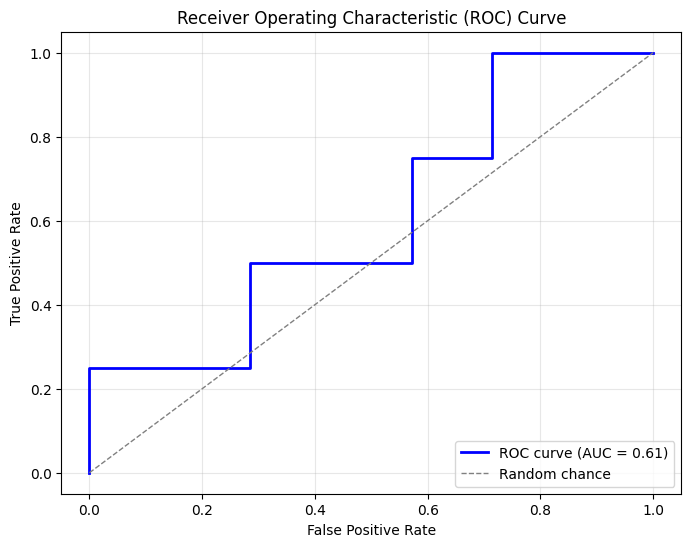

AUC Score: 0.6071428571428572


In [33]:
roc_results = plot_roc_curve(updated_resumes, true_label_column="chosen", score_column="similarity_score")
print("AUC Score:", roc_results["roc_auc"])

# try 2  upper()

In [36]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [37]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase 
    text = text.upper()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [38]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,SKILLS PROGRAMMING LANGUAGES PYTHON PANDAS NUM...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,EDUCATION DETAILS MAY 2013 TO MAY 2017 BE UIT-...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,AREAS OF INTEREST DEEP LEARNING CONTROL SYSTEM...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,SKILLS R PYTHON SAP HANA TABLEAU SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,EDUCATION DETAILS MCA YMCAUST FARIDABAD HARYAN...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,SKILLS C BASICS IOT PYTHON MATLAB DATA SCIENCE...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,SKILLS PYTHON TABLEAU DATA VISUALIZATION R STU...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,EDUCATION DETAILS BTECH RAYAT AND BAHRA INSTIT...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,PERSONAL SKILLS ABILITY TO QUICKLY GRASP TECHN...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,EXPERTISE DATA AND QUANTITATIVE ANALYSIS DECIS...


In [39]:
model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)


/Users/ramaalmrahleh/.cache/huggingface/modules/transformers_modules/nomic-ai/nomic-bert-2048/40b98394640e630d5276807046089b233113aa87/modeling_hf_nomic_bert.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues r

In [40]:
resume_embeddings = model.encode(Data_Science_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)
job_desc_embedding = model.encode([cleaned_job_desc])

In [42]:
updated_resumes = compute_cosine_similarity(job_desc_embedding, resume_embeddings, Data_Science_data)

# Display the results
print("Resumes sorted by similarity score:")
print(updated_resumes)

Resumes sorted by similarity score:
        Category                                             Resume  chosen  \
8   Data Science  Personal Skills â¢ Ability to quickly grasp t...       1   
7   Data Science  Education Details \n B.Tech   Rayat and Bahra ...       1   
5   Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...       0   
2   Data Science  Areas of Interest Deep Learning, Control Syste...       0   
1   Data Science  Education Details \nMay 2013 to May 2017 B.E  ...       0   
0   Data Science  Skills * Programming Languages: Python (pandas...       1   
6   Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...       0   
9   Data Science  Expertise â Data and Quantitative Analysis â...       1   
10            HR  \n HR CONSULTANT       Summary       Subject m...       0   
3   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...       0   
4   Data Science  Education Details \n MCA   YMCAUST,  Faridabad...       0   

               

In [43]:
evaluation_results = evaluate_resume_ranking_general(updated_resumes)
print("Evaluation Results:")
print(evaluation_results)

Evaluation Results:
{'precision': 0.5, 'recall': 0.5, 'ordering_accuracy': 0, 'true_chosen_indices': [8, 7, 0, 9], 'predicted_top_indices': [8, 7, 5, 2], 'TP_count': 2, 'FP_count': 2, 'FN_count': 2, 'TN_count': 5, 'TP': {8, 7}, 'FP': {2, 5}, 'FN': {0, 9}, 'TN': {1, 3, 4, 6, 10}}


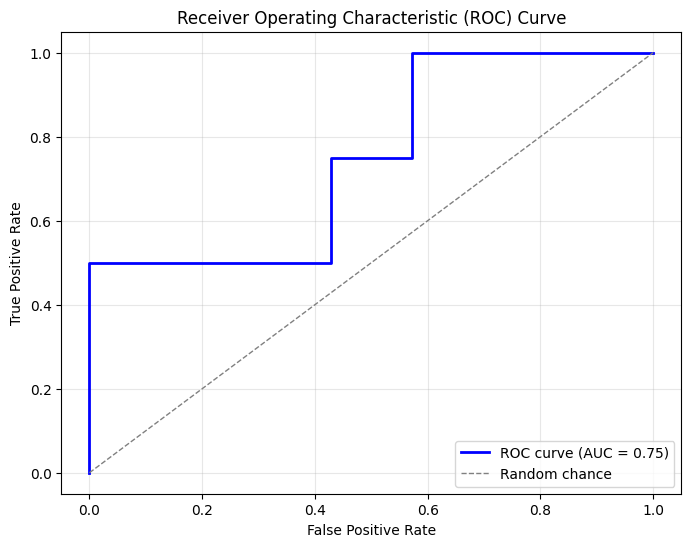

AUC Score: 0.75


In [44]:
roc_results = plot_roc_curve(updated_resumes, true_label_column="chosen", score_column="similarity_score")
print("AUC Score:", roc_results["roc_auc"])

model --> https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

The **SentenceTransformer 'all-MiniLM-L6-v2'** model is a lightweight, efficient embedding model that transforms text into fixed-size numerical representations (embeddings). These embeddings capture the semantic meaning of the text, making it useful for a variety of Natural Language Processing (NLP) tasks such as semantic similarity, clustering, and classification.

---

### Key Features of 'all-MiniLM-L6-v2'

1. **Architecture**:
   - Based on **MiniLM (Miniature Language Model)**, which is a distilled version of Microsoft's BERT model.
   - Incorporates a **6-layer Transformer encoder** (hence "L6").
   - Optimized to be lightweight and efficient, with only ~22 million parameters, compared to larger models like BERT or RoBERTa.

2. **Training Objective**:
   - Trained using the **Sentence-BERT (SBERT)** approach:
     - SBERT adds a pooling layer to the BERT model to generate dense sentence embeddings.
     - It optimizes the model for **pairwise sentence similarity tasks**.
   - Specifically fine-tuned on a large dataset for **semantic similarity** using tasks such as:
     - **Natural Language Inference (NLI)**.
     - **Paraphrase mining**.

3. **Output**:
   - Produces **384-dimensional embeddings** for each sentence.
   - Embeddings capture semantic information and can be directly used for similarity comparisons using metrics like **cosine similarity**.

4. **Applications**:
   - **Semantic Search**: Find the most relevant text for a given query.
   - **Clustering**: Group semantically similar texts.
   - **Classification**: Use embeddings as features for downstream tasks.
   - **Summarization**: Generate embeddings for parts of a document to create summaries.

---

### How It Works

#### 1. **Input Representation**:
   - The input sentence is tokenized into subwords using a WordPiece tokenizer.
   - Example: "The cat sat on the mat" → `[CLS] The cat sat on the mat [SEP]`.

#### 2. **Transformer Encoding**:
   - The tokenized input passes through the 6-layer MiniLM Transformer encoder.
   - Each layer applies:
     - **Multi-Head Self-Attention**: Helps the model focus on different parts of the sentence for context.
     - **Feedforward Neural Networks**: Encodes positional and semantic information.

#### 3. **Pooling**:
   - SBERT uses a **mean pooling strategy** to aggregate token embeddings from the final layer into a fixed-size sentence embedding.
   - Formula: \( \text{Embedding} = \frac{1}{N} \sum_{i=1}^{N} \text{TokenEmbedding}_i \).

#### 4. **Output**:
   - The result is a single 384-dimensional vector representing the semantic meaning of the input text.

---

### Why 'all-MiniLM-L6-v2' Is Popular?

1. **Speed**: Extremely fast for inference due to its smaller size.
2. **Memory Efficiency**: Consumes less memory compared to larger models like BERT or RoBERTa.
3. **Accuracy**: Balances efficiency and performance well, achieving high accuracy on semantic similarity benchmarks like STS (Semantic Textual Similarity).
4. **Versatility**: General-purpose embeddings suitable for diverse NLP tasks.

---
### Comparison with Other Sentence-Transformer Models

| **Model**                     | **Dimensionality** | **Size**   | **Speed** | **Fine-Tuned On**       | **Best For**                           |
|-------------------------------|---------------------|------------|-----------|--------------------------|----------------------------------------|
| bert-base-nli-mean-tokens     | 768                 | Large      | Slower    | NLI (SNLI, MNLI)         | High-quality sentence similarity tasks |
| all-MiniLM-L6-v2              | 384                 | Small      | Faster    | Diverse (general-purpose) | Semantic search, lightweight NLP tasks |

---


In [148]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [149]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [150]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [151]:
# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(Data_Science_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [152]:
updated_resumes = compute_cosine_similarity(job_desc_embedding, resume_embeddings, Data_Science_data)

# Display the results
print("Resumes sorted by similarity score:")
print(updated_resumes)

Resumes sorted by similarity score:
        Category                                             Resume  chosen  \
8   Data Science  Personal Skills â¢ Ability to quickly grasp t...       1   
7   Data Science  Education Details \n B.Tech   Rayat and Bahra ...       1   
0   Data Science  Skills * Programming Languages: Python (pandas...       1   
9   Data Science  Expertise â Data and Quantitative Analysis â...       1   
6   Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...       0   
1   Data Science  Education Details \nMay 2013 to May 2017 B.E  ...       0   
10            HR  \n HR CONSULTANT       Summary       Subject m...       0   
2   Data Science  Areas of Interest Deep Learning, Control Syste...       0   
3   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...       0   
5   Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...       0   
4   Data Science  Education Details \n MCA   YMCAUST,  Faridabad...       0   

               

In [153]:
evaluation_results = evaluate_resume_ranking_general(updated_resumes)
print("Evaluation Results:")
print(evaluation_results)

Evaluation Results:
{'precision': 1.0, 'recall': 1.0, 'ordering_accuracy': 1, 'true_chosen_indices': [8, 7, 0, 9], 'predicted_top_indices': [8, 7, 0, 9], 'TP_count': 4, 'FP_count': 0, 'FN_count': 0, 'TN_count': 7, 'TP': {8, 0, 9, 7}, 'FP': set(), 'FN': set(), 'TN': {1, 2, 3, 4, 5, 6, 10}}


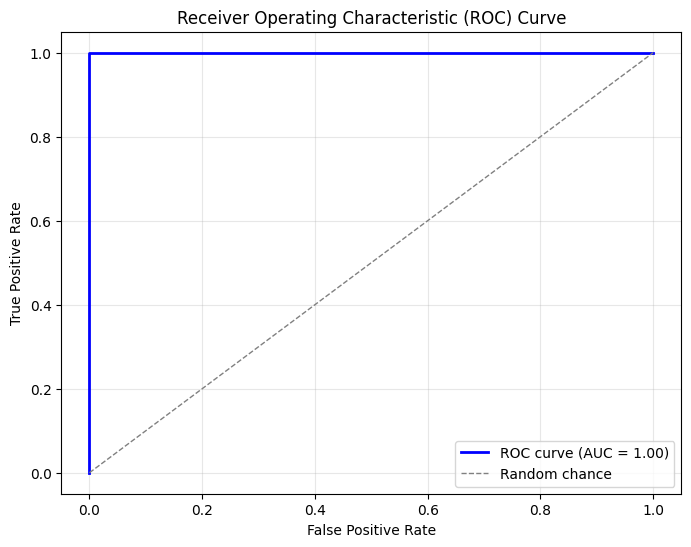

AUC Score: 1.0


In [154]:
roc_results = plot_roc_curve(updated_resumes, true_label_column="chosen", score_column="similarity_score")
print("AUC Score:", roc_results["roc_auc"])

In [155]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase , try upper 
    text = text.upper()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [156]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,SKILLS PROGRAMMING LANGUAGES PYTHON PANDAS NUM...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,EDUCATION DETAILS MAY 2013 TO MAY 2017 BE UIT-...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,AREAS OF INTEREST DEEP LEARNING CONTROL SYSTEM...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,SKILLS R PYTHON SAP HANA TABLEAU SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,EDUCATION DETAILS MCA YMCAUST FARIDABAD HARYAN...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,SKILLS C BASICS IOT PYTHON MATLAB DATA SCIENCE...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,SKILLS PYTHON TABLEAU DATA VISUALIZATION R STU...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,EDUCATION DETAILS BTECH RAYAT AND BAHRA INSTIT...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,PERSONAL SKILLS ABILITY TO QUICKLY GRASP TECHN...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,EXPERTISE DATA AND QUANTITATIVE ANALYSIS DECIS...


In [157]:
# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(Data_Science_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [158]:
updated_resumes = compute_cosine_similarity(job_desc_embedding, resume_embeddings, Data_Science_data)

# Display the results
print("Resumes sorted by similarity score:")
print(updated_resumes)

Resumes sorted by similarity score:
        Category                                             Resume  chosen  \
7   Data Science  Education Details \n B.Tech   Rayat and Bahra ...       1   
8   Data Science  Personal Skills â¢ Ability to quickly grasp t...       1   
9   Data Science  Expertise â Data and Quantitative Analysis â...       1   
1   Data Science  Education Details \nMay 2013 to May 2017 B.E  ...       0   
5   Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...       0   
0   Data Science  Skills * Programming Languages: Python (pandas...       1   
6   Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...       0   
2   Data Science  Areas of Interest Deep Learning, Control Syste...       0   
3   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...       0   
10            HR  \n HR CONSULTANT       Summary       Subject m...       0   
4   Data Science  Education Details \n MCA   YMCAUST,  Faridabad...       0   

               

In [159]:
evaluation_results = evaluate_resume_ranking_general(updated_resumes)
print("Evaluation Results:")
print(evaluation_results)

Evaluation Results:
{'precision': 0.75, 'recall': 0.75, 'ordering_accuracy': 0, 'true_chosen_indices': [7, 8, 9, 0], 'predicted_top_indices': [7, 8, 9, 1], 'TP_count': 3, 'FP_count': 1, 'FN_count': 1, 'TN_count': 6, 'TP': {8, 9, 7}, 'FP': {1}, 'FN': {0}, 'TN': {2, 3, 4, 5, 6, 10}}


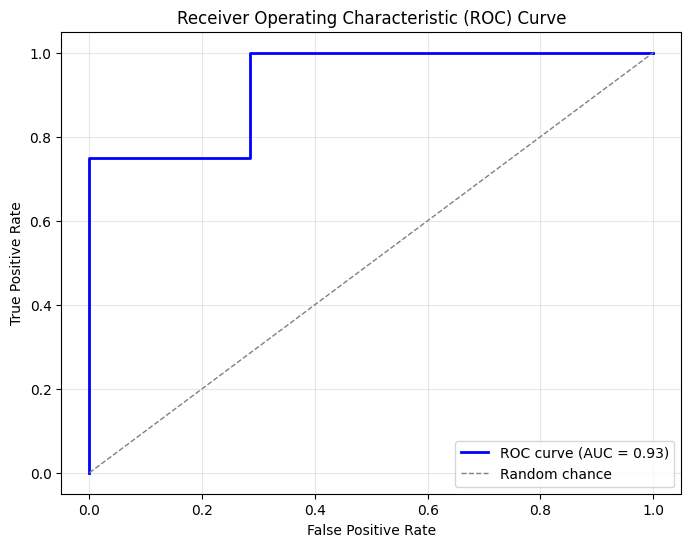

AUC Score: 0.9285714285714286


In [160]:
roc_results = plot_roc_curve(updated_resumes, true_label_column="chosen", score_column="similarity_score")
print("AUC Score:", roc_results["roc_auc"])

In [161]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [162]:
# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(Data_Science_data['Resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)
# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [163]:
updated_resumes = compute_cosine_similarity(job_desc_embedding, resume_embeddings, Data_Science_data)

# Display the results
print("Resumes sorted by similarity score:")
print(updated_resumes)

Resumes sorted by similarity score:
        Category                                             Resume  chosen  \
8   Data Science  Personal Skills â¢ Ability to quickly grasp t...       1   
7   Data Science  Education Details \n B.Tech   Rayat and Bahra ...       1   
0   Data Science  Skills * Programming Languages: Python (pandas...       1   
3   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...       0   
6   Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...       0   
2   Data Science  Areas of Interest Deep Learning, Control Syste...       0   
9   Data Science  Expertise â Data and Quantitative Analysis â...       1   
1   Data Science  Education Details \nMay 2013 to May 2017 B.E  ...       0   
5   Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...       0   
10            HR  \n HR CONSULTANT       Summary       Subject m...       0   
4   Data Science  Education Details \n MCA   YMCAUST,  Faridabad...       0   

    similarity_

In [164]:
evaluation_results = evaluate_resume_ranking_general(updated_resumes)
print("Evaluation Results:")
print(evaluation_results)

Evaluation Results:
{'precision': 0.75, 'recall': 0.75, 'ordering_accuracy': 0, 'true_chosen_indices': [8, 7, 0, 9], 'predicted_top_indices': [8, 7, 0, 3], 'TP_count': 3, 'FP_count': 1, 'FN_count': 1, 'TN_count': 6, 'TP': {8, 0, 7}, 'FP': {3}, 'FN': {9}, 'TN': {1, 2, 4, 5, 6, 10}}


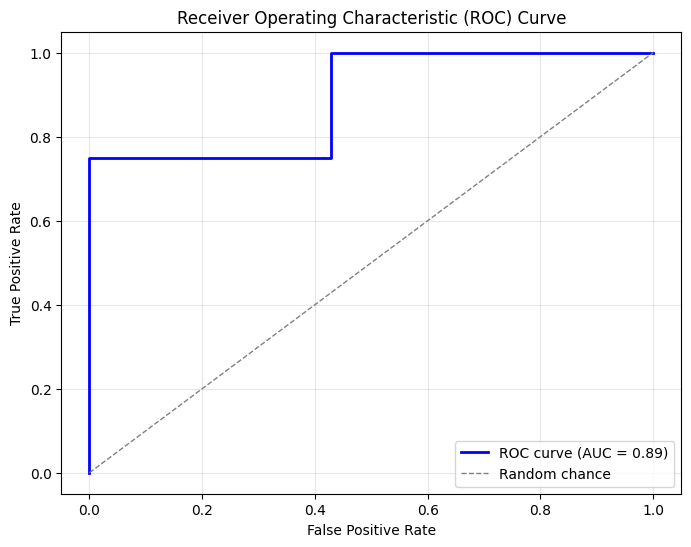

AUC Score: 0.8928571428571428


In [165]:
roc_results = plot_roc_curve(updated_resumes, true_label_column="chosen", score_column="similarity_score")
print("AUC Score:", roc_results["roc_auc"])

In [173]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [174]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [175]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [176]:

# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate BERT embeddings for resumes
resume_embeddings = model.encode(Data_Science_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert the embeddings to a PyTorch tensor
resume_embeddings = torch.tensor(resume_embeddings)

# Normalize the resume embeddings (using PyTorch's normalize function)
resume_embeddings = torch.nn.functional.normalize(resume_embeddings, p=2, dim=1)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [177]:
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

# Convert the job description embedding to a PyTorch tensor
job_desc_embedding = torch.tensor(job_desc_embedding)

# Normalize the job description embedding
job_desc_embedding = torch.nn.functional.normalize(job_desc_embedding, p=2, dim=1)


In [178]:
# Compute the cosine similarity and update the resumes DataFrame
updated_resumes = compute_cosine_similarity(job_desc_embedding.detach().numpy(), resume_embeddings.detach().numpy(), Data_Science_data)

# Display the results
print("Resumes sorted by similarity score:")
print(updated_resumes[['Resume', 'similarity_score',"chosen"]])

evaluation_results = evaluate_resume_ranking_general(updated_resumes)
print("Evaluation Results:")
print(evaluation_results)

Resumes sorted by similarity score:
                                               Resume  similarity_score  \
8   Personal Skills â¢ Ability to quickly grasp t...          0.702185   
7   Education Details \n B.Tech   Rayat and Bahra ...          0.700333   
0   Skills * Programming Languages: Python (pandas...          0.693809   
9   Expertise â Data and Quantitative Analysis â...          0.681737   
6   Skills â¢ Python â¢ Tableau â¢ Data Visuali...          0.668836   
1   Education Details \nMay 2013 to May 2017 B.E  ...          0.609117   
10  \n HR CONSULTANT       Summary       Subject m...          0.604349   
2   Areas of Interest Deep Learning, Control Syste...          0.601863   
3   Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...          0.548185   
5   SKILLS C Basics, IOT, Python, MATLAB, Data Sci...          0.535058   
4   Education Details \n MCA   YMCAUST,  Faridabad...          0.413073   

    chosen  
8        1  
7        1  
0        1  
9        1 

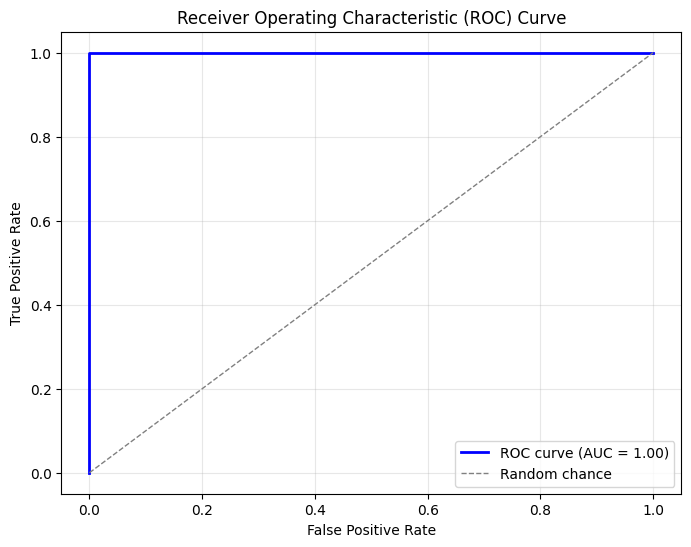

AUC Score: 1.0


In [179]:
roc_results = plot_roc_curve(updated_resumes, true_label_column="chosen", score_column="similarity_score")
print("AUC Score:", roc_results["roc_auc"])

# try 8   with bm25 and without Preprocessing

In [36]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [194]:
# Step 1: BM25 Scoring
# Preprocess resumes and job description
tokenized_resumes = [resume.split() for resume in Data_Science_data['Resume']]
tokenized_job_description = job_description.split()

# BM25 model --> The scores reflect how well each resume matches the job description query.
bm25 = BM25Okapi(tokenized_resumes)
bm25_scores = bm25.get_scores(tokenized_job_description)

# Step 3: Add Results to DataFrame
Data_Science_data['BM25_Score'] = bm25_scores  # Ensure BM25 scores are assigned to this column

# Step 4: Rank Results by Scaled BM25 Score
Data_Science_data_sorted = Data_Science_data.sort_values(by='BM25_Score', ascending=False)

# Display the top results
print(Data_Science_data_sorted[['Resume', 'BM25_Score', 'chosen']])


                                               Resume  BM25_Score  chosen
10  \n HR CONSULTANT       Summary       Subject m...   90.493429       0
7   Education Details \n B.Tech   Rayat and Bahra ...   87.721851       1
3   Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   85.804243       0
0   Skills * Programming Languages: Python (pandas...   68.810643       1
9   Expertise â Data and Quantitative Analysis â...   64.378905       1
8   Personal Skills â¢ Ability to quickly grasp t...   61.494081       1
6   Skills â¢ Python â¢ Tableau â¢ Data Visuali...   61.212156       0
2   Areas of Interest Deep Learning, Control Syste...   50.024071       0
1   Education Details \nMay 2013 to May 2017 B.E  ...   35.712254       0
5   SKILLS C Basics, IOT, Python, MATLAB, Data Sci...   24.544670       0
4   Education Details \n MCA   YMCAUST,  Faridabad...    0.000000       0


In [191]:
evaluation_results = evaluate_resume_ranking_general(Data_Science_data_sorted)
print("Evaluation Results:")
print(evaluation_results)

Evaluation Results:
{'precision': 0.5, 'recall': 0.5, 'ordering_accuracy': 0, 'true_chosen_indices': [7, 0, 9, 8], 'predicted_top_indices': [10, 7, 3, 0], 'TP_count': 2, 'FP_count': 2, 'FN_count': 2, 'TN_count': 5, 'TP': {0, 7}, 'FP': {10, 3}, 'FN': {8, 9}, 'TN': {1, 2, 4, 5, 6}}


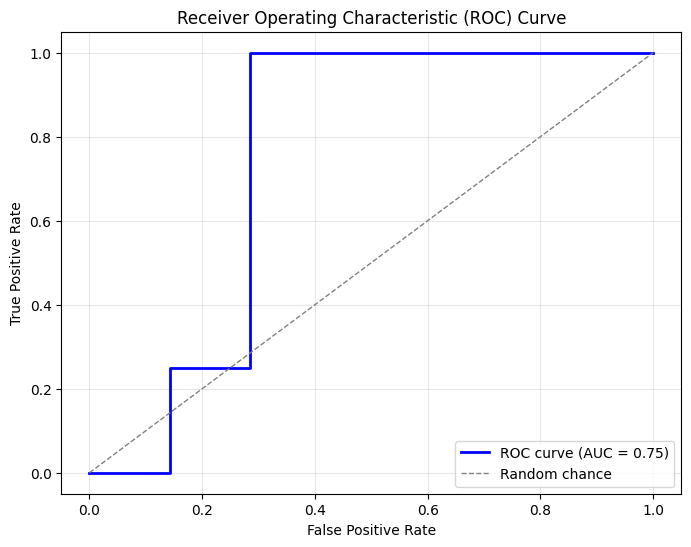

AUC Score: 0.75


In [195]:
roc_results = plot_roc_curve(Data_Science_data_sorted, true_label_column="chosen", score_column="BM25_Score")
print("AUC Score:", roc_results["roc_auc"])

# try 9   with bm25 and with Preprocessing

In [47]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [48]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [49]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [50]:
# Step 1: BM25 Scoring
# Preprocess resumes and job description
tokenized_resumes = [resume.split() for resume in Data_Science_data['cleaned_resume']]
tokenized_job_description = job_description.split()

# BM25 model --> The scores reflect how well each resume matches the job description query.
bm25 = BM25Okapi(tokenized_resumes)
bm25_scores = bm25.get_scores(tokenized_job_description)

# Step 3: Add Results to DataFrame
Data_Science_data['BM25_Score'] = bm25_scores  # Ensure BM25 scores are assigned to this column

# Step 4: Rank Results by Scaled BM25 Score
Data_Science_data_sorted = Data_Science_data.sort_values(by='BM25_Score', ascending=False)

# Display the top results
print(Data_Science_data_sorted[['cleaned_resume', 'BM25_Score', 'chosen']])

                                       cleaned_resume  BM25_Score  chosen
3   skills r python sap hana tableau sap hana sql ...   36.149254       0
10  hr consultant summary subject matter expert hr...   31.572081       0
7   education details btech rayat bahra institute ...   30.681499       1
8   personal skills ability quickly grasp technica...   24.336544       1
6   skills python tableau data visualization r stu...   20.520494       0
9   expertise data quantitative analysis decision ...   17.261120       1
0   skills programming languages python pandas num...   16.508494       1
2   areas interest deep learning control system de...    8.755708       0
1   education details may 2013 may 2017 uit-rgpvda...    7.753676       0
5   skills c basics iot python matlab data science...    7.104779       0
4   education details mca ymcaust faridabad haryan...    0.833060       0


In [200]:
evaluation_results = evaluate_resume_ranking_general(Data_Science_data_sorted)
print("Evaluation Results:")
print(evaluation_results)

Evaluation Results:
{'precision': 0.5, 'recall': 0.5, 'ordering_accuracy': 0, 'true_chosen_indices': [7, 8, 9, 0], 'predicted_top_indices': [3, 10, 7, 8], 'TP_count': 2, 'FP_count': 2, 'FN_count': 2, 'TN_count': 5, 'TP': {8, 7}, 'FP': {10, 3}, 'FN': {0, 9}, 'TN': {1, 2, 4, 5, 6}}


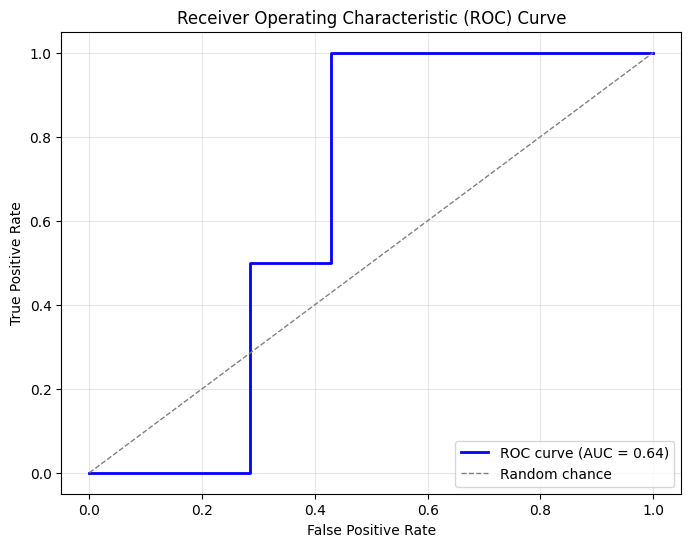

AUC Score: 0.6428571428571428


In [201]:
roc_results = plot_roc_curve(Data_Science_data_sorted, true_label_column="chosen", score_column="BM25_Score")
print("AUC Score:", roc_results["roc_auc"])

# try 10   with bm25 and with Preprocessing upper

In [202]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [203]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.upper()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [204]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,SKILLS PROGRAMMING LANGUAGES PYTHON PANDAS NUM...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,EDUCATION DETAILS MAY 2013 TO MAY 2017 BE UIT-...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,AREAS OF INTEREST DEEP LEARNING CONTROL SYSTEM...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,SKILLS R PYTHON SAP HANA TABLEAU SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,EDUCATION DETAILS MCA YMCAUST FARIDABAD HARYAN...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,SKILLS C BASICS IOT PYTHON MATLAB DATA SCIENCE...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,SKILLS PYTHON TABLEAU DATA VISUALIZATION R STU...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,EDUCATION DETAILS BTECH RAYAT AND BAHRA INSTIT...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,PERSONAL SKILLS ABILITY TO QUICKLY GRASP TECHN...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,EXPERTISE DATA AND QUANTITATIVE ANALYSIS DECIS...


In [205]:
# Step 1: BM25 Scoring
# Preprocess resumes and job description
tokenized_resumes = [resume.split() for resume in Data_Science_data['cleaned_resume']]
tokenized_job_description = job_description.split()

# BM25 model --> The scores reflect how well each resume matches the job description query.
bm25 = BM25Okapi(tokenized_resumes)
bm25_scores = bm25.get_scores(tokenized_job_description)

# Step 3: Add Results to DataFrame
Data_Science_data['BM25_Score'] = bm25_scores  # Ensure BM25 scores are assigned to this column

# Step 4: Rank Results by Scaled BM25 Score
Data_Science_data_sorted = Data_Science_data.sort_values(by='BM25_Score', ascending=False)

# Display the top results
print(Data_Science_data_sorted[['cleaned_resume', 'BM25_Score', 'chosen']])

                                       cleaned_resume  BM25_Score  chosen
6   SKILLS PYTHON TABLEAU DATA VISUALIZATION R STU...   13.014297       0
0   SKILLS PROGRAMMING LANGUAGES PYTHON PANDAS NUM...    0.000000       1
1   EDUCATION DETAILS MAY 2013 TO MAY 2017 BE UIT-...    0.000000       0
2   AREAS OF INTEREST DEEP LEARNING CONTROL SYSTEM...    0.000000       0
3   SKILLS R PYTHON SAP HANA TABLEAU SAP HANA SQL ...    0.000000       0
4   EDUCATION DETAILS MCA YMCAUST FARIDABAD HARYAN...    0.000000       0
5   SKILLS C BASICS IOT PYTHON MATLAB DATA SCIENCE...    0.000000       0
7   EDUCATION DETAILS BTECH RAYAT AND BAHRA INSTIT...    0.000000       1
8   PERSONAL SKILLS ABILITY TO QUICKLY GRASP TECHN...    0.000000       1
9   EXPERTISE DATA AND QUANTITATIVE ANALYSIS DECIS...    0.000000       1
10  HR CONSULTANT SUMMARY SUBJECT MATTER EXPERT IN...    0.000000       0


In [206]:
evaluation_results = evaluate_resume_ranking_general(Data_Science_data_sorted)
print("Evaluation Results:")
print(evaluation_results)

Evaluation Results:
{'precision': 0.25, 'recall': 0.25, 'ordering_accuracy': 0, 'true_chosen_indices': [0, 7, 8, 9], 'predicted_top_indices': [6, 0, 1, 2], 'TP_count': 1, 'FP_count': 3, 'FN_count': 3, 'TN_count': 4, 'TP': {0}, 'FP': {1, 2, 6}, 'FN': {8, 9, 7}, 'TN': {10, 3, 4, 5}}


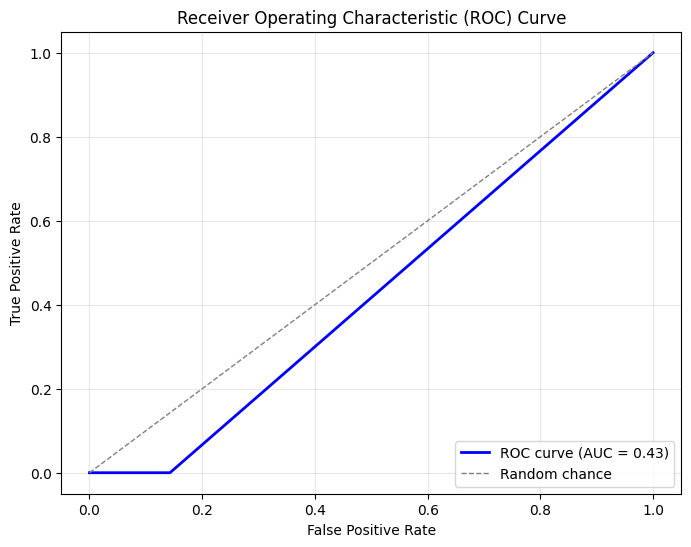

AUC Score: 0.4285714285714286


In [207]:
roc_results = plot_roc_curve(Data_Science_data_sorted, true_label_column="chosen", score_column="BM25_Score")
print("AUC Score:", roc_results["roc_auc"])

# try 11: cosin + BM25 --> hybrid approach

In [212]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [213]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [214]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [215]:
# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(Data_Science_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [216]:
updated_resumes = compute_cosine_similarity(job_desc_embedding, resume_embeddings, Data_Science_data)

# Display the results
print("Resumes sorted by similarity score:")
print(updated_resumes)

Resumes sorted by similarity score:
        Category                                             Resume  chosen  \
8   Data Science  Personal Skills â¢ Ability to quickly grasp t...       1   
7   Data Science  Education Details \n B.Tech   Rayat and Bahra ...       1   
0   Data Science  Skills * Programming Languages: Python (pandas...       1   
9   Data Science  Expertise â Data and Quantitative Analysis â...       1   
6   Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...       0   
1   Data Science  Education Details \nMay 2013 to May 2017 B.E  ...       0   
10            HR  \n HR CONSULTANT       Summary       Subject m...       0   
2   Data Science  Areas of Interest Deep Learning, Control Syste...       0   
3   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...       0   
5   Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...       0   
4   Data Science  Education Details \n MCA   YMCAUST,  Faridabad...       0   

               

In [217]:
updated_resumes

,Category,Resume,chosen,cleaned_resume,similarity_score
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...,0.702186
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...,0.700334
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...,0.693810
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...,0.681737
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...,0.668836
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...,0.609117
10,HR,\n HR CONSULTANT Summary Subject m...,0,hr consultant summary subject matter expert hr...,0.604349
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...,0.601863
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...,0.548185
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...,0.535058


In [219]:
# Step 1: BM25 Scoring
# Preprocess resumes and job description
tokenized_resumes = [resume.split() for resume in updated_resumes['cleaned_resume']]
tokenized_job_description = job_description.split()

# BM25 model --> The scores reflect how well each resume matches the job description query.
bm25 = BM25Okapi(tokenized_resumes)
bm25_scores = bm25.get_scores(tokenized_job_description)

# Step 3: Add Results to DataFrame
updated_resumes['BM25_Score'] = bm25_scores  # Ensure BM25 scores are assigned to this column

# Step 4: Rank Results by Scaled BM25 Score
updated_resumes_sorted = updated_resumes.sort_values(by='BM25_Score', ascending=False)

# Display the top results
print(updated_resumes_sorted[['cleaned_resume', 'BM25_Score', 'chosen',"similarity_score"]])

                                       cleaned_resume  BM25_Score  chosen  \
3   skills r python sap hana tableau sap hana sql ...   36.149254       0   
10  hr consultant summary subject matter expert hr...   31.572081       0   
7   education details btech rayat bahra institute ...   30.681499       1   
8   personal skills ability quickly grasp technica...   24.336544       1   
6   skills python tableau data visualization r stu...   20.520494       0   
9   expertise data quantitative analysis decision ...   17.261120       1   
0   skills programming languages python pandas num...   16.508494       1   
2   areas interest deep learning control system de...    8.755708       0   
1   education details may 2013 may 2017 uit-rgpvda...    7.753676       0   
5   skills c basics iot python matlab data science...    7.104779       0   
4   education details mca ymcaust faridabad haryan...    0.833060       0   

    similarity_score  
3           0.548185  
10          0.604349  
7     

In [220]:
updated_resumes_sorted

,Category,Resume,chosen,cleaned_resume,similarity_score,BM25_Score
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...,0.548185,36.149254
10,HR,\n HR CONSULTANT Summary Subject m...,0,hr consultant summary subject matter expert hr...,0.604349,31.572081
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...,0.700334,30.681499
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...,0.702186,24.336544
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...,0.668836,20.520494
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...,0.681737,17.261120
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...,0.693810,16.508494
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...,0.601863,8.755708
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...,0.609117,7.753676
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...,0.535058,7.104779


In [221]:
updated_resumes_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 3 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          11 non-null     object 
 1   Resume            11 non-null     object 
 2   chosen            11 non-null     int64  
 3   cleaned_resume    11 non-null     object 
 4   similarity_score  11 non-null     float32
 5   BM25_Score        11 non-null     float64
dtypes: float32(1), float64(1), int64(1), object(3)
memory usage: 572.0+ bytes


In [222]:
# Step 1: Normalize Cosine Similarity Scores
scaler = MinMaxScaler()
updated_resumes_sorted['normalized_cosine'] = scaler.fit_transform(updated_resumes_sorted[['similarity_score']])

# Step 2: Normalize BM25 Scores
updated_resumes_sorted['normalized_bm25'] = scaler.fit_transform(updated_resumes_sorted[['BM25_Score']])

# Step 3: Compute Hybrid Score
w1, w2 = 0.5, 0.5
updated_resumes_sorted['hybrid_score'] = (
    w1 * updated_resumes_sorted['normalized_cosine'] +  w2 * updated_resumes_sorted['normalized_bm25'])

# Step 4: Sort by Hybrid Score
updated_resumes_sorted = updated_resumes_sorted.sort_values(by='hybrid_score', ascending=False)

# Display top results
print(updated_resumes_sorted[['cleaned_resume', 'similarity_score', 'BM25_Score', 'hybrid_score', 'chosen']])

                                       cleaned_resume  similarity_score  \
7   education details btech rayat bahra institute ...          0.700334   
8   personal skills ability quickly grasp technica...          0.702186   
10  hr consultant summary subject matter expert hr...          0.604349   
3   skills r python sap hana tableau sap hana sql ...          0.548185   
6   skills python tableau data visualization r stu...          0.668836   
0   skills programming languages python pandas num...          0.693810   
9   expertise data quantitative analysis decision ...          0.681737   
2   areas interest deep learning control system de...          0.601863   
1   education details may 2013 may 2017 uit-rgpvda...          0.609117   
5   skills c basics iot python matlab data science...          0.535058   
4   education details mca ymcaust faridabad haryan...          0.413073   

    BM25_Score  hybrid_score  chosen  
7    30.681499      0.919386       1  
8    24.336544      0

In [223]:
evaluation_results = evaluate_resume_ranking_general(updated_resumes_sorted)
print("Evaluation Results:")
print(evaluation_results)

Evaluation Results:
{'precision': 0.5, 'recall': 0.5, 'ordering_accuracy': 0, 'true_chosen_indices': [7, 8, 0, 9], 'predicted_top_indices': [7, 8, 10, 3], 'TP_count': 2, 'FP_count': 2, 'FN_count': 2, 'TN_count': 5, 'TP': {8, 7}, 'FP': {10, 3}, 'FN': {0, 9}, 'TN': {1, 2, 4, 5, 6}}


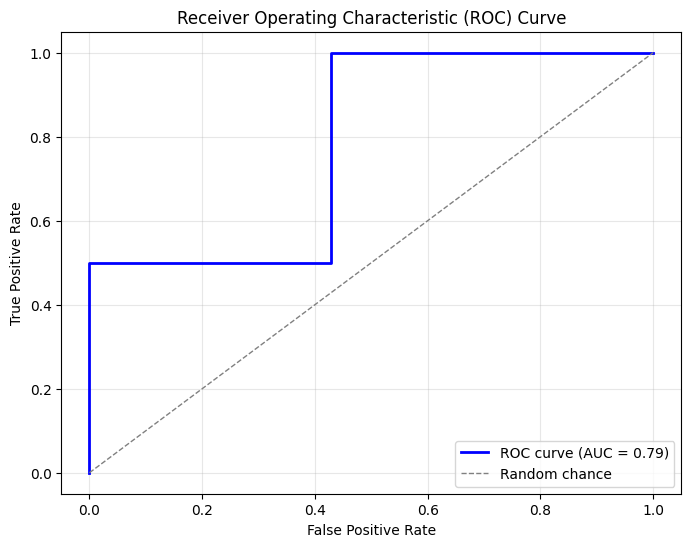

AUC Score: 0.7857142857142857


In [224]:
roc_results = plot_roc_curve(updated_resumes_sorted, true_label_column="chosen", score_column="hybrid_score")
print("AUC Score:", roc_results["roc_auc"])

# try 12 knn metric='cosine' lower text

In [37]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [38]:
Data_Science_data

,Category,Resume,chosen
0,Data Science,Skills * Programming Languages: Python (pandas...,1
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1
9,Data Science,Expertise â Data and Quantitative Analysis â...,1


In [39]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [40]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [41]:
#model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(Data_Science_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
# Perform KNN search
knn = NearestNeighbors(n_neighbors=10, metric='cosine')  # Using cosine similarity
knn.fit(resume_embeddings)

# Find the top nearest resumes to the job description
distances, indices = knn.kneighbors(job_desc_embedding)

# Update the original DataFrame with distances
Data_Science_data["knn_distance"] = float('inf')  # Initialize with a high value for all rows
for idx, dist in zip(indices[0], distances[0]):
    Data_Science_data.loc[idx, "knn_distance"] = dist  # Assign distances to the correct indices

# Sort the DataFrame by the new 'knn_distance' column
sorted_resumes = Data_Science_data.sort_values(by="knn_distance", ascending=True)

# Evaluate the ranking
evaluation_results = evaluate_resume_ranking_general(
    sorted_resumes,
    true_label_column="chosen"
)
# Print the evaluation metrics
print("Evaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")

Evaluation Results:
precision: 0.5
recall: 0.5
ordering_accuracy: 0
true_chosen_indices: [8, 7, 0, 9]
predicted_top_indices: [8, 2, 5, 7]
TP_count: 2
FP_count: 2
FN_count: 2
TN_count: 5
TP: {8, 7}
FP: {2, 5}
FN: {0, 9}
TN: {1, 3, 4, 6, 10}


In [43]:
sorted_resumes

,Category,Resume,chosen,cleaned_resume,knn_distance
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...,0.283311
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...,0.326158
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...,0.326802
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...,0.341938
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...,0.355225
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...,0.356312
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...,0.381603
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...,0.388855
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...,0.392726
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...,0.414092


In [44]:
sorted_resumes['knn_distance'] = sorted_resumes['knn_distance'].replace(np.inf, 1.0)


In [45]:
sorted_resumes

,Category,Resume,chosen,cleaned_resume,knn_distance
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...,0.283311
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...,0.326158
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...,0.326802
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...,0.341938
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...,0.355225
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...,0.356312
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...,0.381603
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...,0.388855
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...,0.392726
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...,0.414092


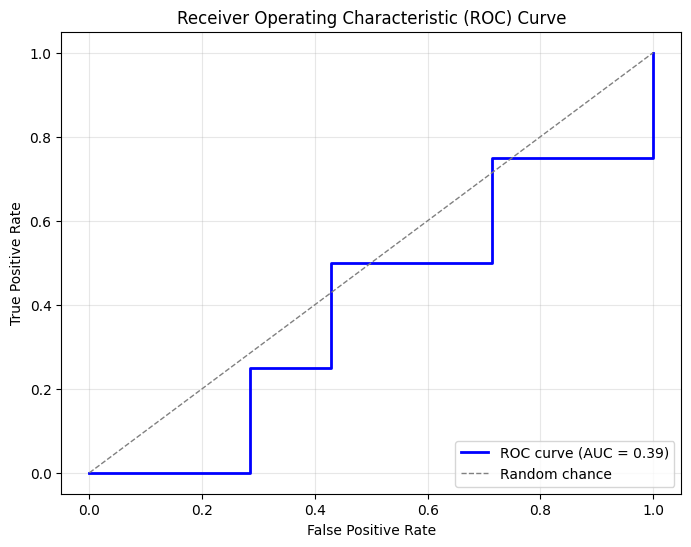

AUC Score: 0.39285714285714285


In [46]:
roc_results = plot_roc_curve(sorted_resumes, true_label_column="chosen", score_column="knn_distance")
print("AUC Score:", roc_results["roc_auc"])

### **Cosine Distance**
- **Cosine similarity** measures how similar two vectors are by calculating the cosine of the angle between them. 
  - A similarity score closer to **1** means the vectors are highly aligned (similar).
  - A score closer to **0** means the vectors are orthogonal (unrelated).
  
  Cosine **distance** is derived as:  
  {Cosine Distance} = 1 - {Cosine Similarity}

  Thus, **lower distance values** indicate higher similarity.



### Key Points:
1. **Lower Distance = Better Match**:
   - Resumes with smaller distances are better aligned with the job description's semantic meaning.
2. **Index Order Is Based on Proximity**:
   - KNN ranks resumes by closeness to the query (job description embedding).
3. **Cosine Distance Values**:
   - Values closer to **0** are more similar, while values closer to **1** are more dissimilar.



# try 13 knn metric='euclidean' lower text

In [51]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [52]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [53]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [54]:
# Load the pre-trained BERT model
#model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)

# Generate BERT embeddings for resumes
resume_embeddings = model.encode(Data_Science_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
# Perform KNN search
knn = NearestNeighbors(n_neighbors=10, metric='euclidean')  # Using cosine similarity
knn.fit(resume_embeddings)

# Find the top nearest resumes to the job description
distances, indices = knn.kneighbors(job_desc_embedding)

# Update the original DataFrame with distances
Data_Science_data["euclidean_distance"] = float('inf')  # Initialize with a high value for all rows
for idx, dist in zip(indices[0], distances[0]):
    Data_Science_data.loc[idx, "euclidean_distance"] = dist  # Assign distances to the correct indices

# Sort the DataFrame by the new 'knn_distance' column
sorted_resumes = Data_Science_data.sort_values(by="euclidean_distance", ascending=True)

# Evaluate the ranking
evaluation_results = evaluate_resume_ranking_general(
    sorted_resumes,
    true_label_column="chosen"
)
# Print the evaluation metrics
print("Evaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")


Evaluation Results:
precision: 0.5
recall: 0.5
ordering_accuracy: 0
true_chosen_indices: [8, 7, 0, 9]
predicted_top_indices: [8, 2, 5, 7]
TP_count: 2
FP_count: 2
FN_count: 2
TN_count: 5
TP: {8, 7}
FP: {2, 5}
FN: {0, 9}
TN: {1, 3, 4, 6, 10}


In [56]:
sorted_resumes['euclidean_distance'] = sorted_resumes['euclidean_distance'].replace(np.inf, 1.0)

Iam using the **KNeighborsClassifier** with Euclidean distance to rank the resumes based on their similarity to the job description. 
### 1. **KNeighborsClassifier and Euclidean Distance**:
   - **KNeighborsClassifier** is used for classification tasks, and it finds the `k` nearest neighbors of a given point (in this case, the job description embedding) in a feature space (the resume embeddings).
   - **Euclidean distance** is the metric used to measure the "closeness" or similarity between the job description and the resumes. The smaller the Euclidean distance, the more similar the resume is to the job description.
   - The **Euclidean distance** between two points is calculated as the square root of the sum of the squared differences of their corresponding coordinates
   - **Smaller Euclidean distances indicate that the resumes are more similar to the job description.**


In [57]:
sorted_resumes

,Category,Resume,chosen,cleaned_resume,euclidean_distance
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...,0.752743
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...,0.807661
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...,0.808458
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...,0.826968
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...,0.842882
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...,0.844171
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...,0.873617
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...,0.881879
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...,0.886257
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...,0.910046


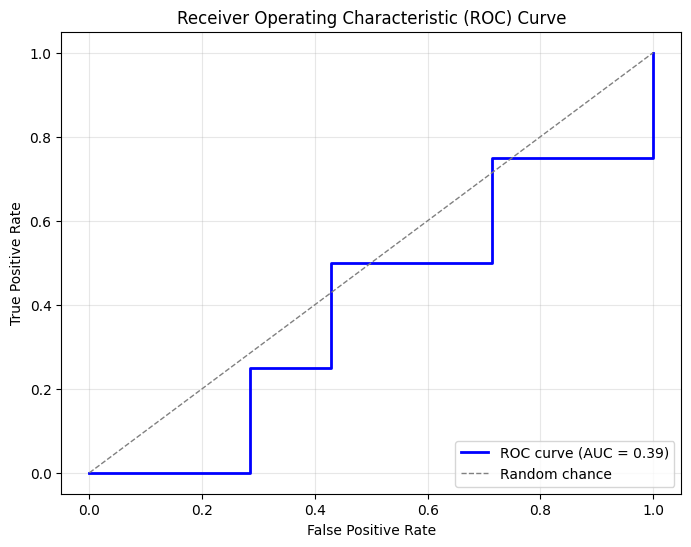

AUC Score: 0.39285714285714285


In [58]:
roc_results = plot_roc_curve(sorted_resumes, true_label_column="chosen", score_column="euclidean_distance")
print("AUC Score:", roc_results["roc_auc"])

# try 15 knn metric='cosin' lower text wih lemmatizer

In [59]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [60]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters (but keep numbers and certain symbols like - and @)
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Perform lemmatization 
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Remove short tokens 
    cleaned_tokens = [word for word in lemmatized_tokens if len(word) > 1]
    
    return ' '.join(cleaned_tokens)


In [61]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skill programming language python panda numpy ...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education detail may 2013 may 2017 uit-rgpvdat...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skill python sap hana tableau sap hana sql sap...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education detail mca ymcaust faridabad haryana...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skill basic iot python matlab data science mac...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skill python tableau data visualization studio...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education detail btech rayat bahra institute e...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skill ability quickly grasp technical...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [62]:

# model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)

resume_embeddings = model.encode(Data_Science_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [63]:
# Perform KNN search
knn = NearestNeighbors(n_neighbors=10, metric='cosine')  # Using cosine similarity
knn.fit(resume_embeddings)

# Find the top nearest resumes to the job description
distances, indices = knn.kneighbors(job_desc_embedding)

# Update the original DataFrame with distances
Data_Science_data["knn_distance"] = float('inf')  # Initialize with a high value for all rows
for idx, dist in zip(indices[0], distances[0]):
    Data_Science_data.loc[idx, "knn_distance"] = dist  # Assign distances to the correct indices

# Sort the DataFrame by the new 'knn_distance' column
sorted_resumes = Data_Science_data.sort_values(by="knn_distance", ascending=True)

# Evaluate the ranking
evaluation_results = evaluate_resume_ranking_general(
    sorted_resumes,
    true_label_column="chosen"
)
# Print the evaluation metrics
print("Evaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")

Evaluation Results:
precision: 0.5
recall: 0.5
ordering_accuracy: 0
true_chosen_indices: [8, 7, 9, 0]
predicted_top_indices: [8, 5, 2, 7]
TP_count: 2
FP_count: 2
FN_count: 2
TN_count: 5
TP: {8, 7}
FP: {2, 5}
FN: {0, 9}
TN: {1, 3, 4, 6, 10}


In [64]:
sorted_resumes

,Category,Resume,chosen,cleaned_resume,knn_distance
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skill ability quickly grasp technical...,0.299909
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skill basic iot python matlab data science mac...,0.320900
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,area interest deep learning control system des...,0.333237
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education detail btech rayat bahra institute e...,0.355147
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education detail may 2013 may 2017 uit-rgpvdat...,0.364754
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skill python tableau data visualization studio...,0.375603
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...,0.408950
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skill programming language python panda numpy ...,0.413462
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skill python sap hana tableau sap hana sql sap...,0.426798
10,HR,\n HR CONSULTANT Summary Subject m...,0,hr consultant summary subject matter expert hr...,0.432833


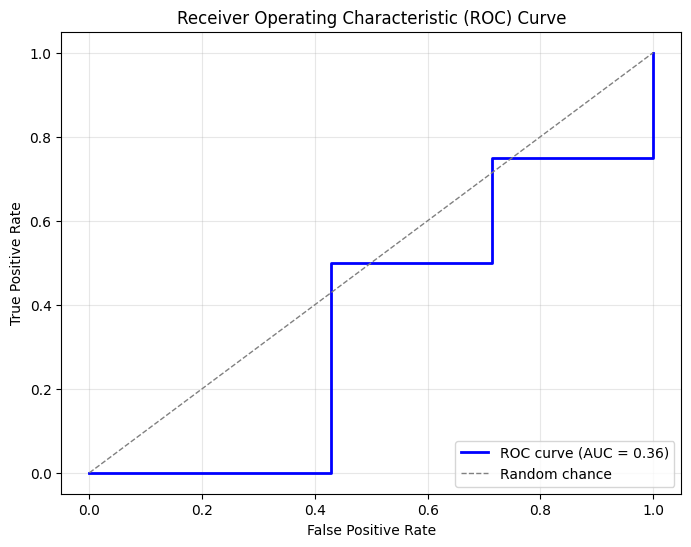

AUC Score: 0.35714285714285715


In [65]:
sorted_resumes['knn_distance'] = sorted_resumes['knn_distance'].replace(np.inf, 1.0)
roc_results = plot_roc_curve(sorted_resumes, true_label_column="chosen", score_column="knn_distance")
print("AUC Score:", roc_results["roc_auc"])

# try ANN FAISS (Facebook AI Similarity Search)  the distance metric used is the L2 (Euclidean) distance. This is determined by the type of FAISS , annoy , hnswlib ,  NearestNeighbors euclidean ,  nomic-ai/nomic-embed-text-v1

In [27]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [28]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [29]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [31]:
model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)
resume_embeddings = model.encode(Data_Science_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

<All keys matched successfully>


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
import faiss
import numpy as np

# Dimension of embeddings
embedding_dim = resume_embeddings.shape[1]

# Create a FAISS index (FlatL2 index for simplicity)
index = faiss.IndexFlatL2(embedding_dim)

# Add resume embeddings to the index
index.add(resume_embeddings)


In [55]:
# Query the index with job description embedding
top_k = 10  # Number of resumes to retrieve
distances, indices = index.search(job_desc_embedding, top_k)

# `distances` gives the distances (lower is better)
distances, indices

(array([[0.5666219 , 0.6523157 , 0.65360487, 0.68387604, 0.71045095,
         0.7126242 , 0.7632064 , 0.7777109 , 0.78545153, 0.8281841 ]],
       dtype=float32),
 array([[8, 2, 5, 7, 1, 6, 0, 3, 9, 4]]))

In [ ]:
# annoy

In [45]:
pip install annoy


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 647 kB 1.0 MB/s eta 0:00:01
  Created wheel for annoy: filename=annoy-1.17.3-cp39-cp39-macosx_10_12_universal2.whl size=116254 sha256=ee92183bbbaa99ebc066d6ecabde9105494a2c4801b619b3ce15d97ad5e55a78
  Stored in directory: /Users/ramaalmrahleh/Library/Caches/pip/wheels/09/a9/54/37478e65995fe712f7da465749da9ddb21db6b1a599d591ac7
Successfully built annoy
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [56]:
from annoy import AnnoyIndex

# Initialize Annoy index
embedding_dim = resume_embeddings.shape[1]
annoy_index = AnnoyIndex(embedding_dim, metric='euclidean')

# Add embeddings to the index
for i, embedding in enumerate(resume_embeddings):
    annoy_index.add_item(i, embedding)

# Build the index
annoy_index.build(n_trees=10)

# Query the index
nearest_neighbors = annoy_index.get_nns_by_vector(job_desc_embedding[0], top_k, include_distances=True)
print(nearest_neighbors)


([8, 2, 5, 7, 1, 6, 0, 3, 9, 4], [0.7527428865432739, 0.8076606392860413, 0.8084584474563599, 0.8269678950309753, 0.842882513999939, 0.8441705107688904, 0.8736169934272766, 0.8818795084953308, 0.8862570524215698, 0.910046398639679])


In [57]:
pip install hnswlib


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp39-cp39-macosx_10_9_universal2.whl size=365382 sha256=62f18eda23aefa127206a8a4b936d7ad47ebe7bb60635dc7fab9b4d6598bf771
  Stored in directory: /Users/ramaalmrahleh/Library/Caches/pip/wheels/81/b3/1d/920a1ed1f9ede20be60d1108445e5789eef54c5144c9d746f6
Successfully built hnswlib
Note: you may need to restart the kernel to use updated packages.


In [59]:
import hnswlib
import numpy as np

# Initialize the HNSW index
embedding_dim = resume_embeddings.shape[1]
num_elements = len(resume_embeddings)

# Create the index
index = hnswlib.Index(space='l2', dim=embedding_dim)  # 'l2' for Euclidean distance
index.init_index(max_elements=num_elements, ef_construction=200, M=16)

# Add embeddings
index.add_items(resume_embeddings)

# Query the index with the job description embedding
top_k = 10
labels, distances = index.knn_query(job_desc_embedding, k=top_k)

print("Indices of nearest neighbors:", labels)
print("Distances of nearest neighbors:", distances)


Indices of nearest neighbors: [[8 2 5 7 1 6 0 3 9 4]]
Distances of nearest neighbors: [[0.56662184 0.6523157  0.65360504 0.68387586 0.71045095 0.7126239
  0.7632066  0.7777115  0.7854516  0.8281845 ]]


In [ ]:
# NearestNeighbors euclidean

In [62]:
from sklearn.neighbors import NearestNeighbors

# Initialize NearestNeighbors
nn = NearestNeighbors(n_neighbors=10, metric='euclidean')  

# Fit the model
nn.fit(resume_embeddings)

# Query with the job description embedding
distances, indices = nn.kneighbors(job_desc_embedding)
print("Indices:", indices)
print("Distances:", distances)


Indices: [[8 2 5 7 1 6 0 3 9 4]]
Distances: [[0.75274288 0.80766058 0.80845829 0.82696798 0.84288249 0.84417071
  0.87361686 0.88187916 0.88625703 0.91004622]]


In [63]:
from sklearn.neighbors import NearestNeighbors

# Initialize NearestNeighbors
nn = NearestNeighbors(n_neighbors=10, metric='cosine') 

# Fit the model
nn.fit(resume_embeddings)

# Query with the job description embedding
distances, indices = nn.kneighbors(job_desc_embedding)
print("Indices:", indices)
print("Distances:", distances)


Indices: [[8 2 5 7 1 6 0 3 9 4]]
Distances: [[0.2833109  0.3261578  0.32680243 0.34193802 0.35522538 0.35631204
  0.38160324 0.38885546 0.3927257  0.41409206]]


# all-MiniLM-L6-v2 with annoy , faiss , nn cosine 

In [73]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [74]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [75]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [66]:
# Calculate the average number of words per resume
average_words = Data_Science_data['Resume'].apply(lambda x: len(x.split())).mean()
average_words

518.2727272727273

In [67]:
# Calculate the average number of words per resume
average_words = Data_Science_data['cleaned_resume'].apply(lambda x: len(x.split())).mean()
average_words

389.09090909090907

In [76]:
# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(Data_Science_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [77]:

# Dimension of embeddings
embedding_dim = resume_embeddings.shape[1]

# Create a FAISS index (FlatL2 index for simplicity)
index = faiss.IndexFlatL2(embedding_dim)

# Add resume embeddings to the index
index.add(resume_embeddings)


In [78]:
# Query the index with job description embedding
top_k = 10  # Number of resumes to retrieve
distances, indices = index.search(job_desc_embedding, top_k)

# `distances` gives the distances (lower is better)
distances, indices

(array([[1.2246914, 1.2745034, 1.2897259, 1.3166844, 1.3555219, 1.3567922,
         1.3998139, 1.4032832, 1.4199699, 1.4254329]], dtype=float32),
 array([[ 3, 10,  4,  9,  6,  0,  7,  8,  5,  1]]))

In [79]:

# Initialize the HNSW index
embedding_dim = resume_embeddings.shape[1]
num_elements = len(resume_embeddings)

# Create the index
index = hnswlib.Index(space='l2', dim=embedding_dim)  # 'l2' for Euclidean distance
index.init_index(max_elements=num_elements, ef_construction=200, M=16)

# Add embeddings
index.add_items(resume_embeddings)

# Query the index with the job description embedding
top_k = 10
labels, distances = index.knn_query(job_desc_embedding, k=top_k)

print("Indices of nearest neighbors:", labels)
print("Distances of nearest neighbors:", distances)


Indices of nearest neighbors: [[ 3 10  4  9  6  0  7  8  5  1]]
Distances of nearest neighbors: [[1.2246915 1.2745034 1.289726  1.316684  1.3555224 1.3567926 1.3998141
  1.4032828 1.4199694 1.4254322]]


In [80]:
# Initialize NearestNeighbors
nn = NearestNeighbors(n_neighbors=10, metric='cosine') 

# Fit the model
nn.fit(resume_embeddings)

# Query with the job description embedding
distances, indices = nn.kneighbors(job_desc_embedding)
print("Indices:", indices)
print("Distances:", distances)


Indices: [[ 3 10  4  9  6  0  7  8  5  1]]
Distances: [[0.6123457  0.6372517  0.64486295 0.6583421  0.67776096 0.6783961
  0.69990695 0.70164156 0.70998496 0.71271634]]


# anther emb Qwen/QwQ-32B-Preview

In [86]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [87]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [88]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np

# Load the tokenizer and model for Qwen/QwQ-32B-Preview
tokenizer = AutoTokenizer.from_pretrained("Qwen/QwQ-32B-Preview")
model = AutoModelForCausalLM.from_pretrained("Qwen/QwQ-32B-Preview")

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)  # Remove special characters (but keep numbers)
    tokens = word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words('english'))  # Define stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_tokens)

# Load the dataset
Data_Science_data = pd.read_csv("Data_Science_data.csv")

# Preprocess the resumes
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)

# Function to generate embeddings using the Qwen model
def generate_embeddings(texts):
    # Tokenize the input texts
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

    # Generate the hidden states
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)  # Ensure correct inputs are passed

    # Get the last hidden state (the final layer's output)
    hidden_states = outputs.hidden_states[-1]  # (batch_size, seq_length, hidden_size)

    # You can take the mean of the hidden states across the sequence length dimension to get a sentence embedding
    embeddings = hidden_states.mean(dim=1)  # Averaging over the token sequence
    return embeddings.numpy()

# Generate BERT-style embeddings for the resumes
resume_embeddings = generate_embeddings(Data_Science_data['cleaned_resume'].tolist())

# Convert embeddings to a NumPy array for efficient computation
resume_embeddings = np.array(resume_embeddings)

# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate embedding for the job description
job_desc_embedding = generate_embeddings([cleaned_job_desc])

# Example: Printing the shape of embeddings to check
print(f"Shape of resume embeddings: {resume_embeddings.shape}")
print(f"Shape of job description embedding: {job_desc_embedding.shape}")


Loading checkpoint shards:   0%|          | 0/17 [00:00<?, ?it/s]

# anther emb bert-base-uncased https://huggingface.co/docs/transformers/en/model_doc/bert

In [26]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [27]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [28]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [41]:
from transformers import BertModel, BertTokenizer
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get embeddings
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the mean of the last hidden state as the sentence embedding
    return outputs.last_hidden_state.mean(dim=1).squeeze()

# Example CV and job description for similarity calculation
cv_text = Data_Science_data['cleaned_resume'].iloc[0]  # First cleaned resume

# Generate embeddings for the CV and job description
cv_embedding = get_embedding(cv_text)
job_desc_embedding = get_embedding(job_description)

# List to store similarity scores
similarity_scores = []

# Iterate over all resumes and calculate the cosine similarity with the job description
for index, row in Data_Science_data.iterrows():
    cv_text = row['cleaned_resume']  # Resume text
    cv_embedding = get_embedding(cv_text)  # Get CV embedding
    
    # Calculate cosine similarity between the resume embedding and job description embedding
    similarity = cosine_similarity([cv_embedding.numpy()], [job_desc_embedding.numpy()])
    
    # Store the similarity score along with the index (resume number)
    similarity_scores.append((index , similarity[0][0]))

# Sort the similarity scores in descending order (highest to lowest)
sorted_similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

# Print the sorted similarity scores
print("Ranking of Resumes by Similarity Score:")
for rank, (resume_index, score) in enumerate(sorted_similarity_scores, start=1):
    print(f"Rank {rank}: Resume {resume_index} - Similarity Score: {score:.4f}")

Ranking of Resumes by Similarity Score:
Rank 1: Resume 6 - Similarity Score: 0.8269
Rank 2: Resume 7 - Similarity Score: 0.8118
Rank 3: Resume 1 - Similarity Score: 0.8061
Rank 4: Resume 2 - Similarity Score: 0.8033
Rank 5: Resume 8 - Similarity Score: 0.8021
Rank 6: Resume 4 - Similarity Score: 0.7969
Rank 7: Resume 5 - Similarity Score: 0.7965
Rank 8: Resume 0 - Similarity Score: 0.7757
Rank 9: Resume 9 - Similarity Score: 0.7728
Rank 10: Resume 3 - Similarity Score: 0.7553
Rank 11: Resume 10 - Similarity Score: 0.7104


# lets try all-MiniLM-L6-v2 form microsoft with chunk the cv cosin similarity

In [88]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [89]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [90]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [91]:
# Function to split text into chunks of max size `chunk_size`
def split_text_into_chunks(text, chunk_size=256):
    tokens = word_tokenize(text)
    # Split tokens into chunks of `chunk_size`
    chunks = [tokens[i:i + chunk_size] for i in range(0, len(tokens), chunk_size)]
    return [' '.join(chunk) for chunk in chunks]

# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

# Function to calculate similarity for all resumes
def calculate_similarity_for_all_resumes(data, model, job_desc_embedding):
    similarity_scores = []
    for resume in data['cleaned_resume']:
        cleaned_resume = preprocess_text(resume)

        # Split the resume into chunks
        resume_chunks = split_text_into_chunks(cleaned_resume)

        # Generate embeddings for each chunk of the resume
        resume_chunk_embeddings = model.encode(resume_chunks, show_progress_bar=True)

        # Convert embeddings to a NumPy array (for efficient computation)
        resume_chunk_embeddings = np.array(resume_chunk_embeddings)

        # Aggregate the embeddings (e.g., by averaging)
        final_resume_embedding = np.mean(resume_chunk_embeddings, axis=0)

        # Ensure embeddings are 2D arrays (shape: (1, embedding_dimension))
        job_desc_embedding_2d = np.array(job_desc_embedding).reshape(1, -1)
        final_resume_embedding_2d = np.array(final_resume_embedding).reshape(1, -1)

        # Compute cosine similarity between the job description and resume embeddings
        similarity_score = cosine_similarity(job_desc_embedding_2d, final_resume_embedding_2d)
        similarity_scores.append(similarity_score[0][0])

    return similarity_scores

# Assuming you have a DataFrame `Data_Science_data` containing a 'cleaned_resume' column
similarity_scores = calculate_similarity_for_all_resumes(Data_Science_data, model, job_desc_embedding)

# Rank the resumes by similarity score in descending order
ranked_resumes = sorted(enumerate(similarity_scores), key=lambda x: x[1], reverse=True)

# Print the ranking of resumes
print("Ranking of Resumes by Similarity Score:")
for rank, (idx, score) in enumerate(ranked_resumes, start=1):
    print(f"Rank {rank}: Resume {idx } - Similarity Score: {score:.4f}")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Ranking of Resumes by Similarity Score:
Rank 1: Resume 7 - Similarity Score: 0.7961
Rank 2: Resume 8 - Similarity Score: 0.7022
Rank 3: Resume 9 - Similarity Score: 0.6992
Rank 4: Resume 0 - Similarity Score: 0.6721
Rank 5: Resume 6 - Similarity Score: 0.6688
Rank 6: Resume 10 - Similarity Score: 0.6352
Rank 7: Resume 1 - Similarity Score: 0.6091
Rank 8: Resume 3 - Similarity Score: 0.6065
Rank 9: Resume 2 - Similarity Score: 0.6019
Rank 10: Resume 5 - Similarity Score: 0.5351
Rank 11: Resume 4 - Similarity Score: 0.4131


# lets try all-MiniLM-L6-v2 form microsoft with chunk the cv knn cosin

In [93]:
# Function to split text into chunks of max size `chunk_size`
def split_text_into_chunks(text, chunk_size=256):
    tokens = word_tokenize(text)
    # Split tokens into chunks of `chunk_size`
    chunks = [tokens[i:i + chunk_size] for i in range(0, len(tokens), chunk_size)]
    return [' '.join(chunk) for chunk in chunks]

# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

# Function to calculate similarity for all resumes using KNN
def calculate_knn_for_resumes(data, model, job_desc_embedding, n_neighbors=10):
    resume_embeddings = []

    for resume in data['cleaned_resume']:
        cleaned_resume = preprocess_text(resume)

        # Split the resume into chunks
        resume_chunks = split_text_into_chunks(cleaned_resume)

        # Generate embeddings for each chunk of the resume
        resume_chunk_embeddings = model.encode(resume_chunks, show_progress_bar=True)

        # Convert embeddings to a NumPy array (for efficient computation)
        resume_chunk_embeddings = np.array(resume_chunk_embeddings)

        # Aggregate the embeddings (e.g., by averaging)
        final_resume_embedding = np.mean(resume_chunk_embeddings, axis=0)

        # Add the final resume embedding to the list
        resume_embeddings.append(final_resume_embedding)

    # Convert to NumPy array
    resume_embeddings = np.array(resume_embeddings)

    # Fit KNN on resume embeddings with the job description as a query
    knn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
    knn.fit(resume_embeddings)

    # Find the nearest neighbors based on the job description embedding
    distances, indices = knn.kneighbors([job_desc_embedding[0]])

    return distances, indices

# Assuming you have a DataFrame `Data_Science_data` containing a 'cleaned_resume' column
distances, indices = calculate_knn_for_resumes(Data_Science_data, model, job_desc_embedding)

# Print the ranking of resumes based on KNN
print("Ranking of Resumes by KNN (Cosine Distance):")
for rank, (idx, dist) in enumerate(zip(indices[0], distances[0]), start=1):
    print(f"Rank {rank}: Resume {idx } - Cosine Distance: {dist:.4f}")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Ranking of Resumes by KNN (Cosine Distance):
Rank 1: Resume 7 - Cosine Distance: 0.2039
Rank 2: Resume 8 - Cosine Distance: 0.2978
Rank 3: Resume 9 - Cosine Distance: 0.3008
Rank 4: Resume 0 - Cosine Distance: 0.3279
Rank 5: Resume 6 - Cosine Distance: 0.3312
Rank 6: Resume 10 - Cosine Distance: 0.3648
Rank 7: Resume 1 - Cosine Distance: 0.3909
Rank 8: Resume 3 - Cosine Distance: 0.3935
Rank 9: Resume 2 - Cosine Distance: 0.3981
Rank 10: Resume 5 - Cosine Distance: 0.4649


# lets try all-MiniLM-L6-v2 form microsoft with chunk the cv knn euclidean

In [95]:
# Function to split text into chunks of max size `chunk_size`
def split_text_into_chunks(text, chunk_size=256):
    tokens = word_tokenize(text)
    # Split tokens into chunks of `chunk_size`
    chunks = [tokens[i:i + chunk_size] for i in range(0, len(tokens), chunk_size)]
    return [' '.join(chunk) for chunk in chunks]

# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

# Function to calculate similarity for all resumes using KNN
def calculate_knn_for_resumes(data, model, job_desc_embedding, n_neighbors=10):
    resume_embeddings = []

    for resume in data['cleaned_resume']:
        cleaned_resume = preprocess_text(resume)

        # Split the resume into chunks
        resume_chunks = split_text_into_chunks(cleaned_resume)

        # Generate embeddings for each chunk of the resume
        resume_chunk_embeddings = model.encode(resume_chunks, show_progress_bar=True)

        # Convert embeddings to a NumPy array (for efficient computation)
        resume_chunk_embeddings = np.array(resume_chunk_embeddings)

        # Aggregate the embeddings (e.g., by averaging)
        final_resume_embedding = np.mean(resume_chunk_embeddings, axis=0)

        # Add the final resume embedding to the list
        resume_embeddings.append(final_resume_embedding)

    # Convert to NumPy array
    resume_embeddings = np.array(resume_embeddings)

    # Fit KNN on resume embeddings with the job description as a query
    knn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')  # Corrected 'enclidean' to 'euclidean'
    knn.fit(resume_embeddings)

    # Find the nearest neighbors based on the job description embedding
    distances, indices = knn.kneighbors([job_desc_embedding[0]])

    return distances, indices

# Assuming you have a DataFrame `Data_Science_data` containing a 'cleaned_resume' column
distances, indices = calculate_knn_for_resumes(Data_Science_data, model, job_desc_embedding)

# Print the ranking of resumes based on KNN
print("Ranking of Resumes by KNN (Cosine Distance):")
for rank, (idx, dist) in enumerate(zip(indices[0], distances[0]), start=1):
    print(f"Rank {rank}: Resume {idx } - Euclidean Distance: {dist:.4f}")



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Ranking of Resumes by KNN (Cosine Distance):
Rank 1: Resume 7 - Euclidean Distance: 0.6098
Rank 2: Resume 9 - Euclidean Distance: 0.7509
Rank 3: Resume 8 - Euclidean Distance: 0.7718
Rank 4: Resume 0 - Euclidean Distance: 0.7862
Rank 5: Resume 6 - Euclidean Distance: 0.8138
Rank 6: Resume 10 - Euclidean Distance: 0.8145
Rank 7: Resume 3 - Euclidean Distance: 0.8594
Rank 8: Resume 1 - Euclidean Distance: 0.8842
Rank 9: Resume 2 - Euclidean Distance: 0.8923
Rank 10: Resume 5 - Euclidean Distance: 0.9643


# edit hr text and try calculate cosin similarity with chunck the cvs

In [141]:
Data_Science_data = pd.read_csv("Data_Science_data.csv")

In [145]:
# remove data word and nlp , ml that i put into the text 
edited_text = """
HR CONSULTANT       Summary       Subject matter expert in HR Applications, and  highly effective at incorporating creative solutions to achieve business objectives, and improve efficiency.  Energetic HR Business  who is self-motivated and results-driven with strong communication, , problem solving and reasoning skills.        Highlights           skills  Project management  Process improvement  Quality assurance and control  System Applications implementation  Microsoft Office Suite expert      Working independently  Strong interpersonal skills  Results-oriented  Fluent in English and Portuguese  Detail-oriented  Troubleshooting  Problem solving            Experience      HR Consultant   10/2016       Company Name   City  ,   State      HRIS - Business :   

Process demand , scoping, and gathering of
requirements for small and large scale HR projects
  
Prepare Business Requirement Documents after
projects have been approved by PMO  Close the gap communication between businesses
and IS 

Support and coordinate functional testing
processes to make sure stakeholders' objectives are met  Document systems and process flows  

Document and  current and future
processes/systems  Deliver and Support user training
  
Process security internal control on the quarterly
basis to assess US HR/Payroll system users.   Send recommendations, and remove/add users
per business requests from local and global systems   

Investigate, coordinate, and resolve with
subject matter experts and/or IS regarding local and Global system issues

  Request HR global system back end/portal roles
for local HRBPs, COE and Front Office users (Americas)  

Responsible to coordinate system applications
changes and new requirements with IS       People  lead:   

Run and deliver the monthly Department of Labor reports
  
Create, run and deliver reports that are
outside GBS People  India's scope  

Support both US Front Office, GBS India, and Americas
Region Center of Excellence with reports and  requests          Business System Applications    02/2014   to   04/2016     Company Name   City  ,   State       Served as conduit between internal and external customers including the IS team through several HRIS projects and daily activities such as interface and  input troubleshooting   Provided expertise in business  for several HRIS projects  Acted as project lead in several HRIS projects, and supported functional testing processes to ensure that system projects meet the needs of all stakeholders  Support user acceptance testing, and user training  Coordinated communications with business and vendors  Documented and d current and future processes/systems  Identified and mapped business needs  Ensured successful project delivery according to business/vendors expectations    Accomplishments:    Implemented Red Carpet/Silkroad On boarding application for US; which improved significantly the new employees' on boarding experience and open visibility to business eliminating cumbersome manual processes  Acted as project lead for the Master  and Benefits interface projects for the in house ERP implementation project.  Worked closely with ADP and business to implement Affordable Care Act in ERP          HRIS Master  Team Lead   06/2011   to   02/2014     Company Name   City  ,   State      •	Trained the HR Specialists to navigate and maintain new/updated system applications and processes  •	Monitored  quality and accuracy based on local/global internal controls  •	Responsible for working with ADP IS to implement new/changes on the HRIS system according to payroll, local and global business requirements.​  •	Ran payroll/non payroll impacting mass loads in SAP for payroll, benefits, or other business purposes.  •	Created and ran reports for subject matter experts  •	Created and ran monthly/quarterly governmental reports  •	Designed and documented HR workflow processes  •	Trained US HR business partners to navigate and utilize the HR/Payroll system   Accomplishments:      Successfully lead and implemented the Workers Comp report project.   Trained the Canadian team on the Global processes for Organization Management and Personnel Administration, and Global System super users          SAP Timekeeping    05/2009   to   11/2010     Company Name   City  ,   State       Gathered all the necessary business and government requirements, including approvals to create/modify Time calculations for new sites or policy changes.  Collected all the time files according to payroll schedules for payroll processing  Processed   and reconciliation  Worked closely with business, Employees Services, and IS to resolve issues/troubleshooting       Accomplishments :   Delivered the time files
without delay for payroll processing for around 47 sites (9,500 employees and around 1,000 contractors)  Designed and implemented solutions
through Access and Excel advanced formulas to validate the  quality, and accuracy
of the  and time results before transmitting the files to payroll� This replaced the manual process enabling efficiency and delivery of files timely           HR  and Applications Specialist   04/2007   to   05/2009     Company Name   City  ,   State       Supported Human Resources Shared Services and act as the subject matter expert for SAP HCM and other HR applications.  Supported Finance, Canada / US Payrolls, and Human Resources Shared Services on bi-weekly and year-end activities   Collaborated with Information Systems, Finance, Canada and US Payroll and Human Resources Business owners on Sarbanes-Oxley requirements and system/process enhancements for key areas of responsibility.  Worked closely with business process owners, smes, benefit vendors and Information Systems to ensure  flow were properly planned and managed, and ensure appropriate  quality controls and standards were developed and maintained globally.  Performed root cause , developed and managed corrective action plans.  Run and d interface error reports for Canada and US payroll systems per Sarbanes-Oxley requirements.  Work closely with process owners and Information Systems to research/ identify/ resolve any interface or  issue identified with vendors or payroll systems  Acted as a project liaison between Human Resources and Information System teams for multiple HR or payroll projects (examples: SAP HCM Compensation project, Canadian Payroll system, European Expat project, US Payroll Year End, Benefits Annual Enrollment, SAP releases)  Provided system training and support for Human Resources Shared Services employees globally for key areas of responsibility  Scheduled release calls, prepared work instructions & Knowledge Base Articles, developed and/or coordinated training for Human Resources Shared Services both locally and regionally   Articulated and identified process improvement opportunities within Human Resources   d and identify processing issues and escalated to Canada and US Payroll, Human Resources and Quality Assurance teams  Created and run Adhoc reports for all Human Resources Shared Services, Internal and External Auditors per Sarbanes-Oxley requirements   Transferred 60 auditing control activities to Quality Assurance team.  Trained new  integrity processors for Quality Assurance   Developed HR compliance reports for Asia, Europe, Canada and US through SAP and DARE systems   Developed 75 reports for external auditors, and developed  integrity and metric reports for 2008 and 2009 Benefits Annual Enrollment   Coordinated testing, meetings, training and communication for Benefits Annual Enrollment for 2008 and 2009 projects for US and Canada.  Lead the review and training of the Canadian Payroll system for all specialists and processors within HR Shared Services           Education      BBA  :   Business Administration   May 2009       Campbell University   City  ,   State  ,   US             Languages    Portuguese, Spanish and English      Skills    Advanced Excel, Access, Word, Visio, Power Point, VBA, SAP HCM, Success Factors (Compensation), Microsoft Project Management, Service Now (ASKHR), Smartsheet, Panaya, SilkRoad - Red Carpet   

Skills  Advanced Excel, Access, Word, Visio, Power Point, VBA, SAP HCM, Success Factors (Compensation), Microsoft Project Management, Service Now (ASKHR), Smartsheet, Panaya, SilkRoad - Red Carpet."""

Data_Science_data.iloc[10, Data_Science_data.columns.get_loc('Resume')] = edited_text

In [146]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [147]:
Data_Science_data['cleaned_resume'] = Data_Science_data['Resume'].apply(preprocess_text)
Data_Science_data

,Category,Resume,chosen,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,1,skills programming languages python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,0,education details may 2013 may 2017 uit-rgpvda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",0,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",0,education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",0,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,0,skills python tableau data visualization r stu...
7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,1,education details btech rayat bahra institute ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,1,personal skills ability quickly grasp technica...
9,Data Science,Expertise â Data and Quantitative Analysis â...,1,expertise data quantitative analysis decision ...


In [148]:
# Function to split text into chunks of max size `chunk_size`
def split_text_into_chunks(text, chunk_size=256):
    tokens = word_tokenize(text)
    # Split tokens into chunks of `chunk_size`
    chunks = [tokens[i:i + chunk_size] for i in range(0, len(tokens), chunk_size)]
    return [' '.join(chunk) for chunk in chunks]

# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

# Function to calculate similarity for all resumes
def calculate_similarity_for_all_resumes(data, model, job_desc_embedding):
    similarity_scores = []
    for resume in data['cleaned_resume']:
        cleaned_resume = preprocess_text(resume)

        # Split the resume into chunks
        resume_chunks = split_text_into_chunks(cleaned_resume)

        # Generate embeddings for each chunk of the resume
        resume_chunk_embeddings = model.encode(resume_chunks, show_progress_bar=True)

        # Convert embeddings to a NumPy array (for efficient computation)
        resume_chunk_embeddings = np.array(resume_chunk_embeddings)

        # Aggregate the embeddings (e.g., by averaging)
        final_resume_embedding = np.mean(resume_chunk_embeddings, axis=0)

        # Ensure embeddings are 2D arrays (shape: (1, embedding_dimension))
        job_desc_embedding_2d = np.array(job_desc_embedding).reshape(1, -1)
        final_resume_embedding_2d = np.array(final_resume_embedding).reshape(1, -1)

        # Compute cosine similarity between the job description and resume embeddings
        similarity_score = cosine_similarity(job_desc_embedding_2d, final_resume_embedding_2d)
        similarity_scores.append(similarity_score[0][0])

    return similarity_scores

similarity_scores = calculate_similarity_for_all_resumes(Data_Science_data, model, job_desc_embedding)

# Rank the resumes by similarity score in descending order
ranked_resumes = sorted(enumerate(similarity_scores), key=lambda x: x[1], reverse=True)

# Print the ranking of resumes
print("Ranking of Resumes by Similarity Score:")
for rank, (idx, score) in enumerate(ranked_resumes, start=1):
    print(f"Rank {rank}: Resume {idx } - Similarity Score: {score:.4f}")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Ranking of Resumes by Similarity Score:
Rank 1: Resume 7 - Similarity Score: 0.7961
Rank 2: Resume 8 - Similarity Score: 0.7022
Rank 3: Resume 9 - Similarity Score: 0.6992
Rank 4: Resume 0 - Similarity Score: 0.6721
Rank 5: Resume 6 - Similarity Score: 0.6688
Rank 6: Resume 1 - Similarity Score: 0.6091
Rank 7: Resume 3 - Similarity Score: 0.6065
Rank 8: Resume 2 - Similarity Score: 0.6019
Rank 9: Resume 10 - Similarity Score: 0.5923
Rank 10: Resume 5 - Similarity Score: 0.5351
Rank 11: Resume 4 - Similarity Score: 0.4131


# with the hr and data ---  
Ranking of Resumes by Similarity Score:
Rank 1: Resume 7 - Similarity Score: 0.7961
Rank 2: Resume 8 - Similarity Score: 0.7022
Rank 3: Resume 9 - Similarity Score: 0.6992
Rank 4: Resume 0 - Similarity Score: 0.6721
Rank 5: Resume 6 - Similarity Score: 0.6688
Rank 6: Resume 10 - Similarity Score: 0.6352
Rank 7: Resume 1 - Similarity Score: 0.6091
Rank 8: Resume 3 - Similarity Score: 0.6065
Rank 9: Resume 2 - Similarity Score: 0.6019
Rank 10: Resume 5 - Similarity Score: 0.5351
Rank 11: Resume 4 - Similarity Score: 0.4131

# removing the data , analysis , nlp , ml , dl
Ranking of Resumes by Similarity Score:
Rank 1: Resume 7 - Similarity Score: 0.7961
Rank 2: Resume 8 - Similarity Score: 0.7022
Rank 3: Resume 9 - Similarity Score: 0.6992
Rank 4: Resume 0 - Similarity Score: 0.6721
Rank 5: Resume 6 - Similarity Score: 0.6688
Rank 6: Resume 1 - Similarity Score: 0.6091
Rank 7: Resume 3 - Similarity Score: 0.6065
Rank 8: Resume 2 - Similarity Score: 0.6019
Rank 9: Resume 10 - Similarity Score: 0.5923
Rank 10: Resume 5 - Similarity Score: 0.5351
Rank 11: Resume 4 - Similarity Score: 0.4131